<a href="https://colab.research.google.com/github/chicocasanova/mvp_sprint_3/blob/main/MVP_3_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introdução

###Sobre o database escolhido

Neste MVP estou utilizando um database extraído do Kaggle ("https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results/data"). Ele consiste em uma tabela abrangindo 120 anos de olimpíadas, de Atenas em 1896 até as do Rio 2016, ou seja, desde o surgimento dos jogos olimpicos modernos. Os dados são relativos aos atletas, suas federações e medalhas. Para esse estudo, excluí todos os dados referentes às olimpíadas de inverno, estou usando apenas os da de verão.

####Catálogo de dados

| **Nome da Coluna** | **Descrição**                                         |
|--------------------|-------------------------------------------------------|
| **ID**             | Número único para cada atleta                          |
| **Name**           | Nome do atleta                                         |
| **Sex**            | M ou F                                                 |
| **Age**            | Número inteiro                                         |
| **Height**         | Em centímetros                                         |
| **Weight**         | Em quilogramas                                         |
| **Team**           | Nome da equipe                                         |
| **NOC**            | Código de 3 letras do Comitê Olímpico Nacional         |
| **Games**          | Ano e temporada                                        |
| **Year**           | Número inteiro                                         |
| **Season**         | Verão ou Inverno                                       |
| **City**           | Cidade-sede                                           |
| **Sport**          | Esporte                                                |
| **Event**          | Evento                                                 |
| **Medal**          | Ouro, Prata, Bronze ou NA                              |

Cada linha do dataset corresponde a participação de um atleta em uma modalidade em determinado ano. Ou seja, os 3 juntos constituem uma possível chave primária.

### Definição do problema
O objetivo deste trabalho será explorar e analisar os dados, tentando responder a algumas perguntas propostas inicialmente e, no final, após conhecer melhor o dataset, propor algum insight que poderia ser adquirido através de Machine Learning e realizar os tratamentos necessários para tal.


###Perguntas propostas

- Quais são os esportes presentes no maior número de olimpíadas?
- Algum deles esteve presente em todas?
- Qual o número total de esportes já praticados em olimpíadas?
- Existe algum padrão quanto ao número de esportes incluídos nas edições ao longo dos anos?
- Qual esporte teve mais modalidades diferentes ao longo dos anos?
- Alguma modalidade esteve presente em todos as edições?
- Alguma cidade já foi sede por mais de uma vez? Qual ou quais?
- Como se comporta o número de atletas inscritos ao longo dos anos?
- Quantos atletas já participaram de ao menos uma olimpíada?
- Quantos já participaram de mais de uma edição?
- Qual o número máximo de participações de um mesmo atleta em diferentes olimpíadas?
- Algum atleta já participou em esportes diferentes? Quantos atletas?
- Qual o maior número de esportes diferentes já praticados por um mesmo atleta?
- Existe algum esporte no qual é mais provável que um mesmo atleta compita em diferentes anos?



## Importando o dataset

In [308]:
# importação
import google.colab as cl
import gdown

# tratamento e operações
import pandas as pd
import numpy as np

# gráficos
import seaborn as sns
from matplotlib import pyplot as plt

REMOVER BLOCO ABAIXO

In [309]:
# URL original do drive
# https://drive.google.com/file/d/1CQ_X-BlU93PtRICF1NLlA0nOQpa5Ne8S/view?usp=sharing

# Google Drive file ID
file_id = '1CQ_X-BlU93PtRICF1NLlA0nOQpa5Ne8S'

# Constroi a URL de download
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Define um local file name (you can use the ID or any name you prefer)
file_name = f'{file_id}.csv'

# Download the file from Google Drive
gdown.download(download_url, file_name, quiet=False)

# Read the CSV file and append to datasets list
df_raw = pd.read_csv(file_name)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1CQ_X-BlU93PtRICF1NLlA0nOQpa5Ne8S
From (redirected): https://drive.google.com/uc?export=download&id=1CQ_X-BlU93PtRICF1NLlA0nOQpa5Ne8S&confirm=t&uuid=6a25fb99-b9c0-49af-9525-8de7d850d158
To: /content/1CQ_X-BlU93PtRICF1NLlA0nOQpa5Ne8S.csv
100%|██████████| 29.7M/29.7M [00:00<00:00, 64.1MB/s]


##Análise preliminar do dataset

Começo criando um backup do dataset original

In [310]:
# Criando cópia do dataset para preservação do original
df = df_raw.copy()

###Insights sobre head e tail

Começo visualizado o head e tail:

In [311]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


In [312]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
222551,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN


É possível ver que existem dados faltantes nos atributos 'Height' e 'Weight' etiquetados da mesma maneira (NaN) que os valores de não medalhistas do campo 'Medal', o que é um conflito semântico. No primeiro caso, são dados de fato faltantes, já no segundo, não, pois "quem não ganhou uma medalha" é um dado objetivo.

###Insights sobre os tipos de dados dos atributos e suas contagens de linha

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222552 entries, 0 to 222551
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      222552 non-null  int64  
 1   Name    222552 non-null  object 
 2   Sex     222552 non-null  object 
 3   Age     213363 non-null  float64
 4   Height  170695 non-null  float64
 5   Weight  168698 non-null  float64
 6   Team    222552 non-null  object 
 7   NOC     222552 non-null  object 
 8   Games   222552 non-null  object 
 9   Year    222552 non-null  int64  
 10  Season  222552 non-null  object 
 11  City    222552 non-null  object 
 12  Sport   222552 non-null  object 
 13  Event   222552 non-null  object 
 14  Medal   34088 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 25.5+ MB


Todos os tipos parecem estar coerentes com a informação armazenada, exceto a coluna 'Age' que é float e poderia ser int.


É possível ver que existem dados faltantes nas colunas 'Age', 'Height' e 'Weight', isso deve ser melhor examinado posteriormente. Criei a hipótese de que esses dados só foram captados a partir de um determinado ano, logo talvez exista um padrão nos nulls.

###Insights iniciais sobre as métricas dos dados
Mais a frente irei analisar essas descrições separadas de acordo com o sexo do atleta, porque indicadores como peso e altura podem variar muito segundo esse critério. O ideal seria fazê-lo, principalmente, por esporte, porque o peso de um peso pesado do judô é totalmente incompatível com o de um jóquei, mas isso seria um estudo enorme por si só e está fora do escopo desse projeto.

In [314]:
df.describe()

,ID,Age,Height,Weight,Year
count,222552.000000,213363.000000,170695.000000,168698.00000,222552.000000
mean,67998.925712,25.674053,175.515551,70.68906,1976.317094
std,39139.038228,6.699839,10.914725,14.80394,30.942802
min,1.000000,10.000000,127.000000,25.00000,1896.000000
25%,34000.750000,21.000000,168.000000,60.00000,1956.000000
50%,68302.500000,24.000000,175.000000,70.00000,1984.000000
75%,101881.000000,28.000000,183.000000,79.00000,2000.000000
max,135568.000000,97.000000,226.000000,214.00000,2016.000000


Todos os atributos tem outliers expressivos, o que é de se esperar visto que temos variações motivadas pelos motivos citados acima. Os que mais me chamam a atenção dentre eles são os valores max e min da idade (97 e 10 anos) e min de peso (25kg).

##Os esportes olímpicos

In [315]:
# Buscando por valores nulos
valores_nulos = df['Sport'].isnull().sum()

if valores_nulos == 0:
  print("Não há valores nulos.")
else:
  print(f"{valores_nulos} valores nulos encontrados.")

Não há valores nulos.


Inicialmente procuro saber quantos esportes tem no dataset:

In [316]:
# Total de número de esportes praticados nas olimpíadas do dataset
print(f"O número total de esportes do dataset é {df['Sport'].nunique()}.")

O número total de esportes do dataset é 52.


Ao longo dos anos, foram praticados 52 esportes diferentes.

Em seguida observo quais já participaram de todas as edições:

In [317]:
# Obter os anos únicos e os esportes únicos por ano
anos_unicos = df['Year'].unique()
esportes_por_ano = df.groupby('Year')['Sport'].unique()

# Obter a interseção de esportes praticados em todos os anos
esportes_em_todos_os_anos = set.intersection(*map(set, esportes_por_ano))

# Transformar para uma lista e ordenar
esportes_em_todos_os_anos = sorted(list(esportes_em_todos_os_anos))

print(f"Esportes presentes em todas as olimpíadas: {esportes_em_todos_os_anos}")

Esportes presentes em todas as olimpíadas: ['Athletics', 'Cycling', 'Fencing', 'Gymnastics', 'Swimming']


Os únicos esportes presentes em todas as edições sâo: atletismo, ciclismo, esgrima, ginástica olímpica e natação.

Para saber em quantas edições cada esporte já esteve presente, montei a tabela abaixo:

In [318]:
# Contar as ocorrências únicas de cada esporte por ano
esporte_por_ano_unico = df[['Year', 'Sport']].drop_duplicates()

# Contar o número de edições únicas que cada esporte apareceu
contagem_edicoes_por_esporte = esporte_por_ano_unico['Sport'].value_counts().reset_index()
contagem_edicoes_por_esporte.columns = ['Esporte', 'Número de olimpíadas']

# Ordenar os esportes pelo número de edições em que apareceram
contagem_edicoes_por_esporte = contagem_edicoes_por_esporte.sort_values('Número de olimpíadas', ascending=False)

# Exibir o DataFrame
contagem_edicoes_por_esporte

,Esporte,Número de olimpíadas
0,Fencing,29
2,Swimming,29
3,Gymnastics,29
4,Cycling,29
1,Athletics,29
5,Rowing,28
6,Wrestling,28
7,Diving,27
8,Water Polo,27
9,Football,27


Descobri que 10 esportes diferentes estiveram em apenas 1 olimpíada.

Para visualizar melhor esses dados, fiz um gráfico de barras.

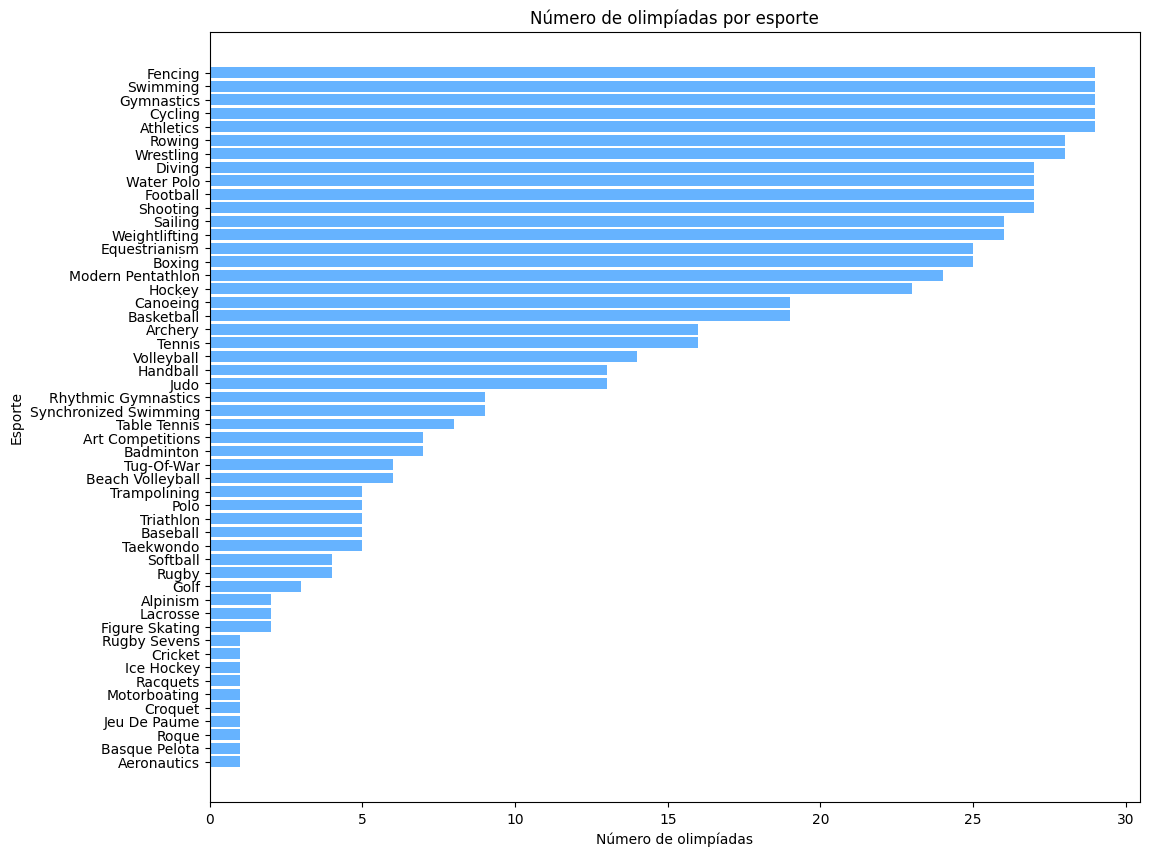

In [319]:
# Plotar gráfico de barras para o número de olímpiadas nas quais um esporte esteve presente

plt.figure(figsize=(12, 10))
plt.barh(contagem_edicoes_por_esporte['Esporte'], contagem_edicoes_por_esporte['Número de olimpíadas'], color='#66b3ff')
plt.xlabel('Número de olimpíadas')
plt.ylabel('Esporte')
plt.title('Número de olimpíadas por esporte')
plt.gca().invert_yaxis()  # Inverter para que os esportes com mais edições apareçam no topo
plt.show()


Para saber como o número de esportes por ano se deu ao longo do tempo, fiz um gráfico de linha.

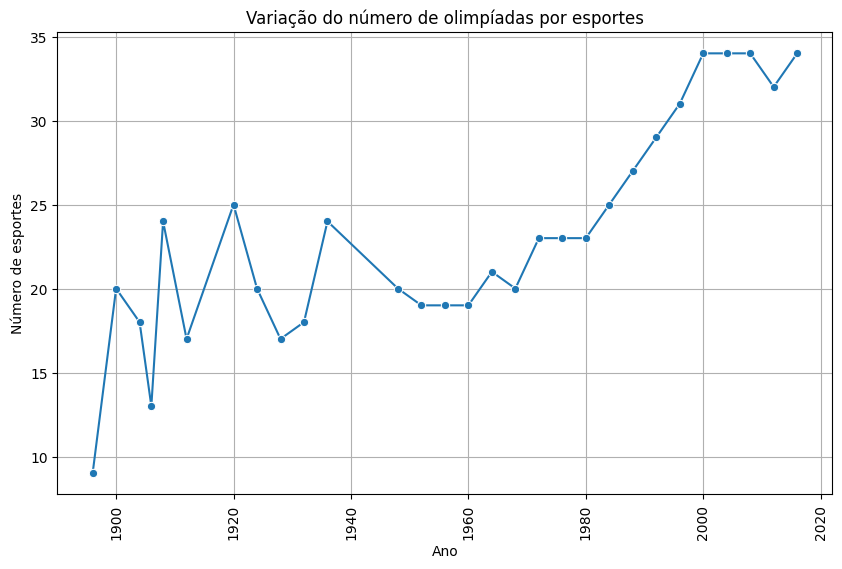

In [320]:
# Agrupando por 'Year' e contando os unique 'Sport'
sport_count_per_year = df.groupby('Year')['Sport'].nunique().reset_index()

# Plot usando seaborn para gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Sport', data=sport_count_per_year, marker='o')
plt.xticks(rotation=90)
plt.xlabel('Ano')
plt.ylabel('Número de esportes')
plt.title('Variação do número de olimpíadas por esportes')
plt.grid(True)
plt.show()


Se vê que ao longo dos anos existiu uma tendência de aumento de esportes por edição, tendo essa tendência se estabilizado a partir do ano 2000.

Para identificar como a ocorrência de cada esporte se deu ao longo das edições e assim visualizar lacunas temporais, fiz um gráfico de calor.

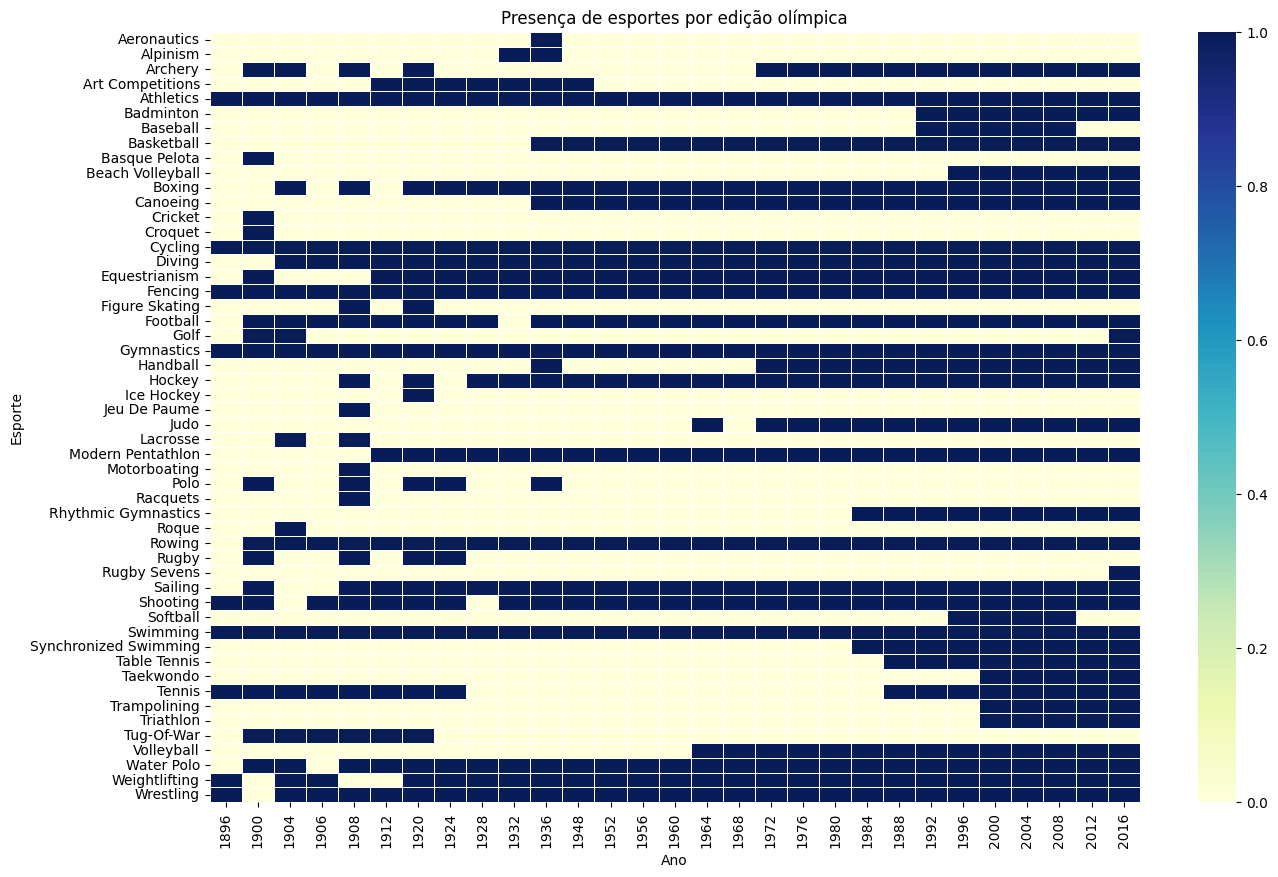

In [321]:
# Criar uma tabela cruzada para os esportes por ano, indicando presença (1) ou ausência (0)
tabela_heatmap = esporte_por_ano_unico.pivot_table(index='Sport', columns='Year', aggfunc='size', fill_value=0)

# Plotar o heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(tabela_heatmap, cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.xlabel('Ano')
plt.ylabel('Esporte')
plt.title('Presença de esportes por edição olímpica')
plt.show()

A adoção do esporte "tenis" teve uma característica ímpar, ele esteve presente nas primeiras 8 edições, depois saiu por um período de 13 olimpíadas, até que voltou a estar presente em todos os anos a partir de 1988. O esporte "arco e flecha" teve um comportamento parecido.


A adoção do esporte "tenis" teve uma característica ímpar, ele esteve presente nas primeiras 8 edições, depois saiu por um período de 13 olimpíadas, até que voltou a estar presente em todos os anos a partir de 1988. O esporte "arco e flecha" teve um comportamento parecido.

Em geral, um esporte que para de ser incluído em mais de 3 edições não volta a ser incluído em nenhuma.

Duas anedotas surgem dos dados, a modalidade cabo de guerra esteve presente em 5 jogos olímpicos e a competição de artes plásticas em 7.

##As modalidades olímpicas

In [322]:
# Buscando por valores nulos
valores_nulos = df['Event'].isnull().sum()

if valores_nulos == 0:
  print("Não há valores nulos.")
else:
  print(f"{valores_nulos} valores nulos encontrados.")

Não há valores nulos.


Para descobrir quantas modalidades cada esporte já teve e, toda a história das olimpíadas, montei a tabela abaixo:

In [323]:
# Contar o número de eventos únicos para cada esporte
eventos_por_esporte = df.groupby('Sport')['Event'].nunique().reset_index()

# Renomear as colunas para clareza
eventos_por_esporte.columns = ['Esporte', 'Modalidades']

# Ordenar os esportes pelo número de eventos únicos
eventos_por_esporte = eventos_por_esporte.sort_values('Modalidades', ascending=False)

# Exibir o DataFrame
eventos_por_esporte


,Esporte,Modalidades
4,Athletics,83
38,Shooting,83
40,Swimming,55
14,Cycling,44
37,Sailing,38
51,Wrestling,30
2,Archery,29
3,Art Competitions,29
21,Gymnastics,27
11,Canoeing,27


Os 2 esportes com, disparado, mais modalidades são atletismo e tiro esportivo, ambos com 83.

Para visualizar melhor a proporção desse dado entre os esporte, fiz um gráfico de barras:

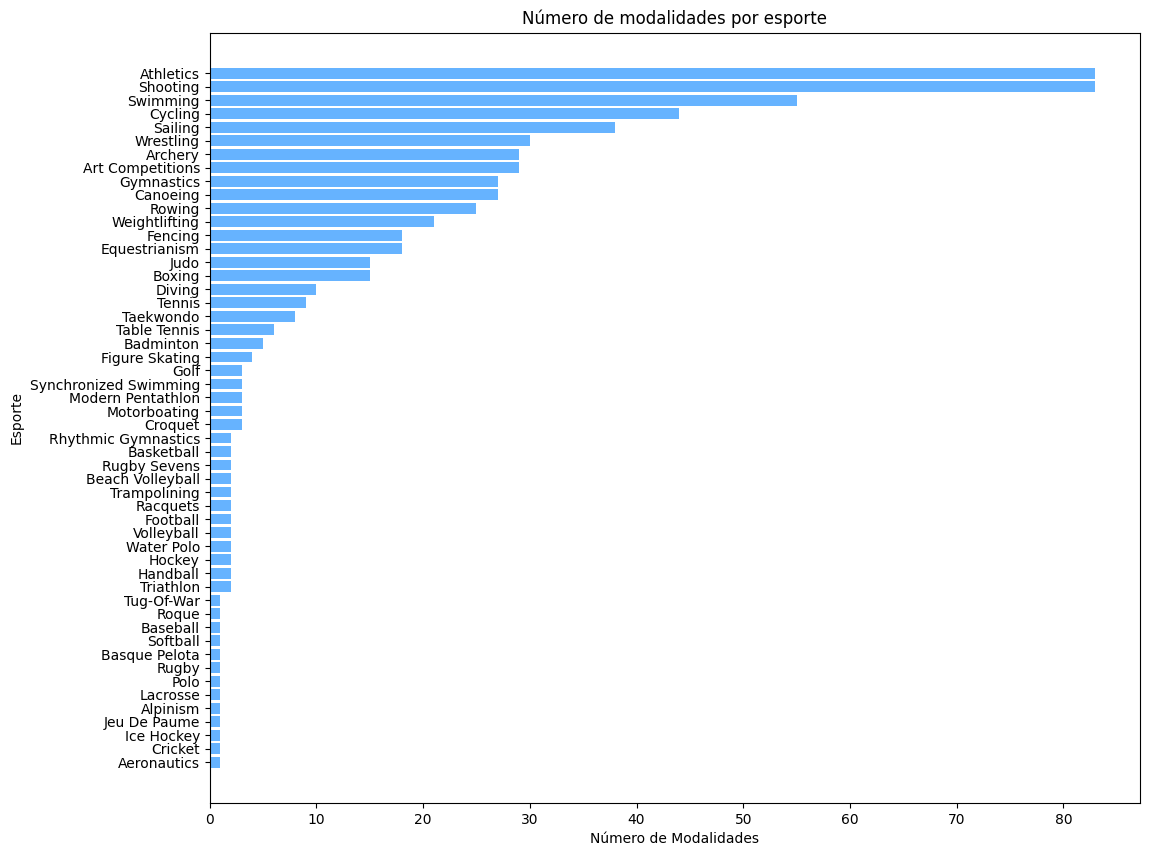

In [324]:
# Plotar gráfico de barras para o número de modalidades únicas por esporte

plt.figure(figsize=(12, 10))
plt.barh(eventos_por_esporte['Esporte'], eventos_por_esporte['Modalidades'], color='#66b3ff')
plt.xlabel('Número de Modalidades')
plt.ylabel('Esporte')
plt.title('Número de modalidades por esporte')
plt.gca().invert_yaxis()  # Inverter para que os esportes com mais modalidades apareçam no topo
plt.show()


A grande maioria dos esportes tem menos de 5 modalidades.

Para entender melhor as estatísticas desse dado, criei um boxplot:

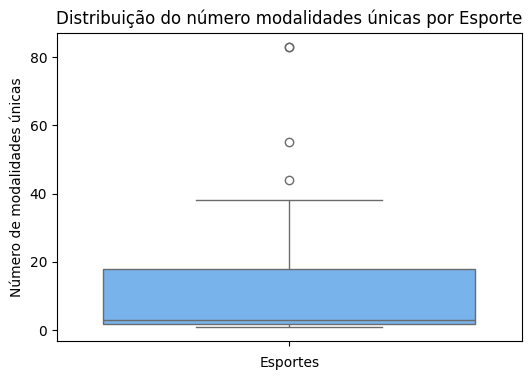

In [325]:
# Criar o boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(data=eventos_por_esporte, y='Modalidades', color='#66b3ff')

plt.ylabel('Número de modalidades únicas')
plt.xlabel('Esportes')
plt.title('Distribuição do número modalidades únicas por Esporte')
plt.show()


As estatísticas sugerem que o número de modalidades por esporte tem uma distribuição assimétrica com uma concentração de valores baixos e alguns valores muito altos (outliers).

In [326]:
# Obter todos os anos únicos
anos_unicos = df['Year'].unique()

# Encontrar os eventos únicos por ano
eventos_por_ano = df.groupby('Year')['Event'].unique()

# Identificar os eventos que apareceram em todos os anos
eventos_em_todos_os_anos = set.intersection(*map(set, eventos_por_ano))

# Contar o número de eventos que participaram de todas as edições
numero_eventos_todos_anos = len(eventos_em_todos_os_anos)

print(f"Quantidade de eventos que participaram de todas as edições olímpicas: {numero_eventos_todos_anos}")


Quantidade de eventos que participaram de todas as edições olímpicas: 13


13 modalidades estiveram presentes em todas as olimpíadas

São elas as modalidades listadas abaixo:

In [327]:
# Obter todos os anos únicos
anos_unicos = df['Year'].unique()

# Encontrar os eventos únicos por ano
eventos_por_ano = df.groupby('Year')['Event'].unique()

# Identificar os eventos que apareceram em todos os anos
eventos_em_todos_os_anos = sorted(set.intersection(*map(set, eventos_por_ano)))

# Exibir a lista de eventos em ordem alfabética
print(f"Eventos que participaram de todas as edições olímpicas (em ordem alfabética):")
for evento in eventos_em_todos_os_anos:
    print(evento)


Eventos que participaram de todas as edições olímpicas (em ordem alfabética):
Athletics Men's 1,500 metres
Athletics Men's 100 metres
Athletics Men's 110 metres Hurdles
Athletics Men's 400 metres
Athletics Men's 800 metres
Athletics Men's Discus Throw
Athletics Men's High Jump
Athletics Men's Long Jump
Athletics Men's Marathon
Athletics Men's Pole Vault
Athletics Men's Shot Put
Athletics Men's Triple Jump
Fencing Men's Sabre, Individual


##As cidades-sede

In [328]:
# Buscando por valores nulos
valores_nulos = df['City'].isnull().sum()

if valores_nulos == 0:
  print("Não há valores nulos.")
else:
  print(f"{valores_nulos} valores nulos encontrados.")

Não há valores nulos.


Faço uma contagem do número de edições e de cidades no dataset:

In [329]:
num_edicoes = len( df['Year'].unique() )
num_cidades = len( df['City'].unique() )

print(f'Número de edições: {num_edicoes}')
print(f'Número de cidades: {num_cidades}')

Número de edições: 29
Número de cidades: 23


Inicialmente descobri que foram 29 edições e apenas 23 cidades, fica evidente que houveram reincidências.

In [330]:
# Agrupar os anos em que cada cidade foi sede
cidades_anos = df[['Year', 'City']].drop_duplicates().groupby('City')['Year'].apply(list).reset_index()

# Adicionar a contagem de edições sediadas por cada cidade
cidades_anos['Número de Edições'] = cidades_anos['Year'].apply(len)

# Ordenar pelo número de edições
cidades_anos = cidades_anos.sort_values('Número de Edições', ascending=False)

# Exibir o DataFrame
cidades_anos


,City,Year,Número de Edições
2,Athina,"[2004, 1906, 1896]",3
8,London,"[2012, 1948, 1908]",3
20,Stockholm,"[1912, 1956]",2
9,Los Angeles,"[1932, 1984]",2
15,Paris,"[1900, 1924]",2
0,Amsterdam,[1928],1
13,Moskva,[1980],1
21,Sydney,[2000],1
19,St. Louis,[1904],1
18,Seoul,[1988],1


A primeira olimpíada ocorreu em Atenas.

Apenas 5 cidades foram sedes da olimpíada por mais de 1 vez: Atenas, Londres, Estocolmo, Los Angeles e Paris. As 2 primeiras foram 3 vezes e as 3 últimas 2 vezes.

##Como se dá a participação dos atletas pelo número de olimpíadas e esportes

In [331]:
# Buscando por valores nulos
valores_nulos = df['City'].isnull().sum()

if valores_nulos == 0:
  print("Não há valores nulos.")
else:
  print(f"{valores_nulos} valores nulos encontrados.")

Não há valores nulos.


Começo o estudo contanto o número de atletas cadastrados:

In [332]:
print(f"O número total de atletas cadastrados na base é de {df['ID'].nunique()}")

O número total de atletas cadastrados na base é de 116776


Crio uma tabela para saber quantos atletas participaram de cada edição da olimpíada.

In [333]:
# Contar o número de IDs únicos por ano
ids_por_ano = df.groupby('Year')['ID'].nunique().reset_index()

# Renomear colunas para clareza
ids_por_ano.columns = ['Ano', 'Número de atletas']

# Exibir o DataFrame
ids_por_ano


,Ano,Número de atletas
0,1896,176
1,1900,1224
2,1904,650
3,1906,841
4,1908,2024
5,1912,2409
6,1920,2676
7,1924,3256
8,1928,3247
9,1932,1922


Crio um gráfico de linha para ver ao longo do tempo como se dá o número de atletas inscritos:

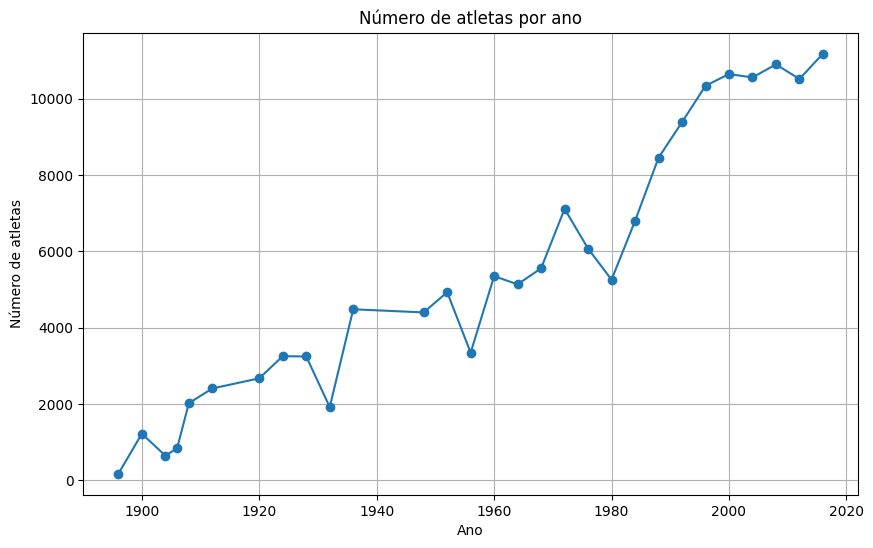

In [334]:
# Plotar gráfico de linha para o número de IDs únicos por ano
plt.figure(figsize=(10, 6))
plt.plot(ids_por_ano['Ano'], ids_por_ano['Número de atletas'], marker='o')
plt.xlabel('Ano')
plt.ylabel('Número de atletas')
plt.title('Número de atletas por ano')
plt.grid(True)
plt.show()


O número de atletas por olimpíada aumentou significantemente ao longo dos anos, aproximadamente em 10 vezes desde os primeiros jogos. Ele se estabilizou a partir dos anos 2000 mas parece que continua a subir lentamente.

In [335]:
# Contar o número de edições (anos) que cada atleta participou usando o 'ID'
participacoes_por_atleta = df[['ID', 'Year']].drop_duplicates()
contagem_participacoes = participacoes_por_atleta.groupby('ID').size().reset_index(name='Número de Edições')

# Filtrar atletas que participaram de mais de uma Olimpíada
atletas_multiplas_olimpiadas = contagem_participacoes[contagem_participacoes['Número de Edições'] > 1]

# Contar o número de atletas que participaram de mais de uma Olimpíada
numero_atletas_multiplas_olimpiadas = len(atletas_multiplas_olimpiadas)

print(f"Quantidade de atletas que participaram de mais de uma edição das Olimpíadas: {numero_atletas_multiplas_olimpiadas}")


Quantidade de atletas que participaram de mais de uma edição das Olimpíadas: 30396


- 116776 atletas já participaram de uma olimpíada e 30396 atletas já participaram de mais de uma.

In [336]:
# Contar o número de edições (anos) que cada atleta participou usando o 'ID'
participacoes_por_atleta = df[['ID', 'Year']].drop_duplicates()
contagem_participacoes = participacoes_por_atleta.groupby('ID').size().reset_index(name='Número de Edições')

# Contar atletas que participaram de mais de uma Olimpíada
numero_atletas_multiplas = (contagem_participacoes['Número de Edições'] > 1).sum()

# Contar total de atletas
total_atletas = contagem_participacoes.shape[0]

# Calcular proporção
proporcoes = [numero_atletas_multiplas, total_atletas - numero_atletas_multiplas]
labels = ['Mais de uma edição', 'Apenas uma edição']


Para visualizar essa proporção, criei um gráfico de pizza:

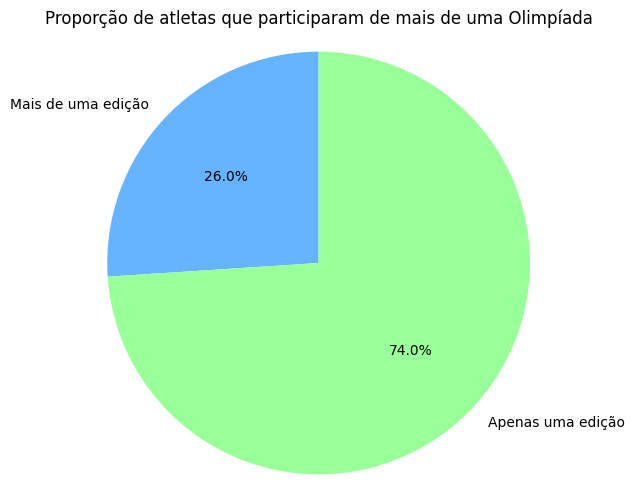

In [337]:
# Plotar gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(proporcoes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.axis('equal')
plt.title('Proporção de atletas que participaram de mais de uma Olimpíada')
plt.show()


Nele é possível constatar que 26% dos atletas já inscritos, participaram de mais de uma olimpíada.

Agrupo o número de atletas pelo número de vezes que participaram de uma olimpíada:

In [338]:
# Contar o número de edições (anos) que cada atleta participou usando o 'ID'
participacoes_por_atleta = df[['ID', 'Year']].drop_duplicates()
contagem_participacoes = participacoes_por_atleta.groupby('ID').size().reset_index(name='Número de Edições')

# Contar a distribuição do número de participações
distribuicao_participacoes = contagem_participacoes['Número de Edições'].value_counts().reset_index()
distribuicao_participacoes.columns = ['Número de Participações', 'Número de Atletas']
distribuicao_participacoes = distribuicao_participacoes.sort_values('Número de Participações')

# Exibir os dados
print('Quantas olimpíadas um mesmo atleta já participou:')
for index, row in distribuicao_participacoes.iterrows():
    print(f"{row['Número de Participações']} olimpíada: {row['Número de Atletas']}")


Quantas olimpíadas um mesmo atleta já participou:
1 olimpíada: 86380
2 olimpíada: 21720
3 olimpíada: 6426
4 olimpíada: 1688
5 olimpíada: 418
6 olimpíada: 105
7 olimpíada: 27
8 olimpíada: 9
9 olimpíada: 2
10 olimpíada: 1


Estou curioso para conhecer os outliers acima, mais abaixo voltarei a eles.

Faço um boxplot desses dados para visualizar as estatísticas descritivas:

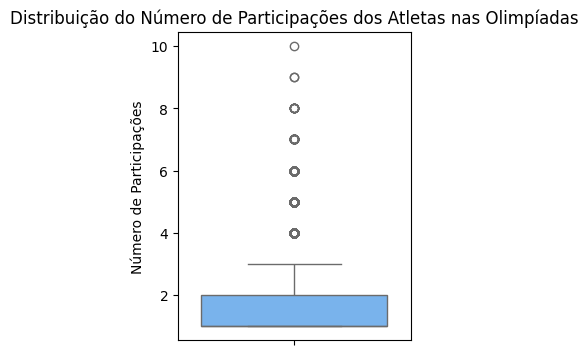

In [339]:
# Contar o número de edições (anos) que cada atleta participou usando o 'ID'
participacoes_por_atleta = df[['ID', 'Year']].drop_duplicates()
contagem_participacoes = participacoes_por_atleta.groupby('ID').size().reset_index(name='Número de Participações')

# Plotar o boxplot na vertical
plt.figure(figsize=(3, 4))
sns.boxplot(y=contagem_participacoes['Número de Participações'], color='#66b3ff')
plt.ylabel('Número de Participações')
plt.title('Distribuição do Número de Participações dos Atletas nas Olimpíadas')
plt.show()


Existem poucos mas expressivos outliers, pouquíssimos atletas participaram de mais de 2 olimpíadas.

Crio um ranking para saber quem são os 10 atletas que mais participaram de edições da olimpíada.

In [340]:
# Contar o número de edições (anos) que cada atleta participou usando o 'ID'
participacoes_por_atleta = df[['ID', 'Name', 'Year', 'Sport']].drop_duplicates()

# Contar o número de edições únicas para cada atleta
contagem_participacoes = participacoes_por_atleta.groupby(['ID', 'Name']).agg(
    Número_de_Edições=('Year', 'nunique')
).reset_index()

# Adicionar a informação de esporte principal (o esporte mais frequente) para cada atleta
esporte_por_atleta = participacoes_por_atleta.groupby(['ID', 'Name'])['Sport'].agg(lambda x: x.mode().iloc[0]).reset_index()

# Mesclar os dados de participações com os esportes
contagem_participacoes = contagem_participacoes.merge(esporte_por_atleta, on=['ID', 'Name'])

# Ordenar os atletas pelo número de edições de forma decrescente
contagem_participacoes = contagem_participacoes.sort_values('Número_de_Edições', ascending=False)

# Selecionar os 10 atletas que mais participaram
top_atletas = contagem_participacoes.head(14)

# Exibir o DataFrame
top_atletas


,ID,Name,Número_de_Edições,Sport
68967,79855,Ian Millar,10,Equestrianism
85639,99155,Hubert Raudaschl,9,Sailing
56405,65378,Afanasijs Kuzmins,9,Shooting
90539,104879,Nino Salukvadze (-Machavariani),8,Shooting
24650,28051,Piero D'Inzeo,8,Equestrianism
44854,51618,Josefa Idem-Guerrini,8,Canoeing
12644,14388,Francisco Boza Dibos,8,Shooting
103340,119965,Lesley Allison Thompson-Willie,8,Rowing
28466,32458,Paul Bert Elvstrm,8,Sailing
23634,26880,Rajmond Debevec,8,Shooting


Apenas 1 único atleta, Ian Millar do hipismo, participou de 10 olimpíadas e até hoje detem o recorde mundial de participações.

Para saber se existe algum esporte específico com propensão a que um atleta compita novamente em outro ano, agrupei por esportes o número de atletas que já participaram de mais de uma olimpíada:

In [341]:
# Selecionar colunas relevantes e remover duplicatas para considerar apenas participações únicas de cada atleta por edição
participacoes_por_atleta = df[['ID', 'Year', 'Sport']].drop_duplicates()

# Contar o número de edições únicas em que cada atleta participou (independente do esporte)
contagem_participacoes = participacoes_por_atleta.groupby('ID').agg({'Year': 'nunique'}).reset_index()
contagem_participacoes.columns = ['ID', 'Número_de_Edições']

# Filtrar atletas que participaram de mais de uma edição
atletas_multiplas_edicoes = contagem_participacoes[contagem_participacoes['Número_de_Edições'] > 1]

# Mesclar com os esportes que esses atletas praticavam
atletas_multiplas_edicoes_com_sport = atletas_multiplas_edicoes.merge(participacoes_por_atleta[['ID', 'Sport']], on='ID').drop_duplicates()

# Contar o número de atletas com múltiplas edições por esporte
esportes_ranking = atletas_multiplas_edicoes_com_sport['Sport'].value_counts().reset_index()
esportes_ranking.columns = ['Esporte', 'Número de Atletas']

# Ordenar o ranking de esportes
esportes_ranking = esportes_ranking.sort_values('Número de Atletas', ascending=False)

# Exibir o DataFrame
esportes_ranking


,Esporte,Número de Atletas
0,Athletics,6287
1,Swimming,2503
2,Rowing,1894
3,Shooting,1547
4,Fencing,1520
5,Wrestling,1421
6,Cycling,1294
7,Sailing,1234
8,Hockey,1203
9,Canoeing,1082


O esporte em que mais atletas participaram de mais de uma edição olímpica é o atletismo que dispara na frente com 6287 atletas reincidentes, seguido pela natação com 2420. Esse dado entretanto deve ser analisado com cautela porque esses dois esportes estão presentes em absolutamente todas as edições dos jogos olímpicos, o que pode ser um fator importante no comportamento desses dados. Além do fato de que existem mais vagas para o atletismo do que para a maioria dos outros esportes, vide o número de modalidades incluídas.

Para responder melhor a pergunta proposta no escopo do projeto, que é se existe algum esporte onde exista maior probabilidade de um mesmo atleta competir em mais de uma olimpíada, criei uma tabela agrupando pelo esporte a razão entre o número total de participantes e o número de participantes que foram em mais de 1 olimpíada, para descobrir assim a porcentagem de atletas que participa em mais de 1 edição.

In [342]:
# Selecionar colunas relevantes e remover duplicatas para considerar apenas participações únicas de cada atleta por edição
participacoes_por_atleta = df[['ID', 'Year', 'Sport']].drop_duplicates()

# Contar o número de edições únicas em que cada atleta participou
contagem_participacoes = participacoes_por_atleta.groupby('ID').agg({'Year': 'nunique'}).reset_index()
contagem_participacoes.columns = ['ID', 'Número_de_Edições']

# Filtrar atletas que participaram de mais de uma edição
atletas_multiplas_edicoes = contagem_participacoes[contagem_participacoes['Número_de_Edições'] > 1]

# Mesclar atletas que participaram de mais de uma edição com os esportes
atletas_multiplas_edicoes_com_sport = atletas_multiplas_edicoes.merge(participacoes_por_atleta[['ID', 'Sport']], on='ID').drop_duplicates()

# Contar o número de atletas únicos que participaram de mais de uma edição por esporte
esportes_multiplas_edicoes = atletas_multiplas_edicoes_com_sport['Sport'].value_counts().reset_index()
esportes_multiplas_edicoes.columns = ['Esporte', 'Atletas com Múltiplas Edições']

# Contar o número total de atletas únicos por esporte
atletas_totais_por_esporte = participacoes_por_atleta['Sport'].value_counts().reset_index()
atletas_totais_por_esporte.columns = ['Esporte', 'Atletas Totais']

# Mesclar a contagem total de atletas com a contagem de atletas com múltiplas edições
tabela_proporcao = atletas_totais_por_esporte.merge(esportes_multiplas_edicoes, on='Esporte', how='left')

# Preencher valores NaN com 0 (casos em que não há atletas com múltiplas edições)
tabela_proporcao['Atletas com Múltiplas Edições'].fillna(0, inplace=True)

# Calcular a proporção
tabela_proporcao['Proporção'] = tabela_proporcao['Atletas com Múltiplas Edições'] / tabela_proporcao['Atletas Totais']

# Exibir a tabela final com esportes e proporções
tabela_proporcao_final = tabela_proporcao[['Esporte', 'Proporção']]

# Exibir o DataFrame
tabela_proporcao_final.sort_values('Proporção', ascending=False)


,Esporte,Proporção
32,Triathlon,0.258979
25,Badminton,0.253865
31,Beach Volleyball,0.251773
24,Table Tennis,0.246575
38,Trampolining,0.243421
15,Water Polo,0.239470
8,Fencing,0.237834
20,Diving,0.235592
26,Modern Pentathlon,0.229060
12,Canoeing,0.226882


Descobri que o triathlon, badminton e volei de praia são os esportes com maior chance, mais de 25%, de um atleta competir em mais de uma edição. Ou seja, 1 em cada 4 atletas competem em mais de uma olimpíada.

Para visualisar melhor esse dado, fiz um gráfico de barras:

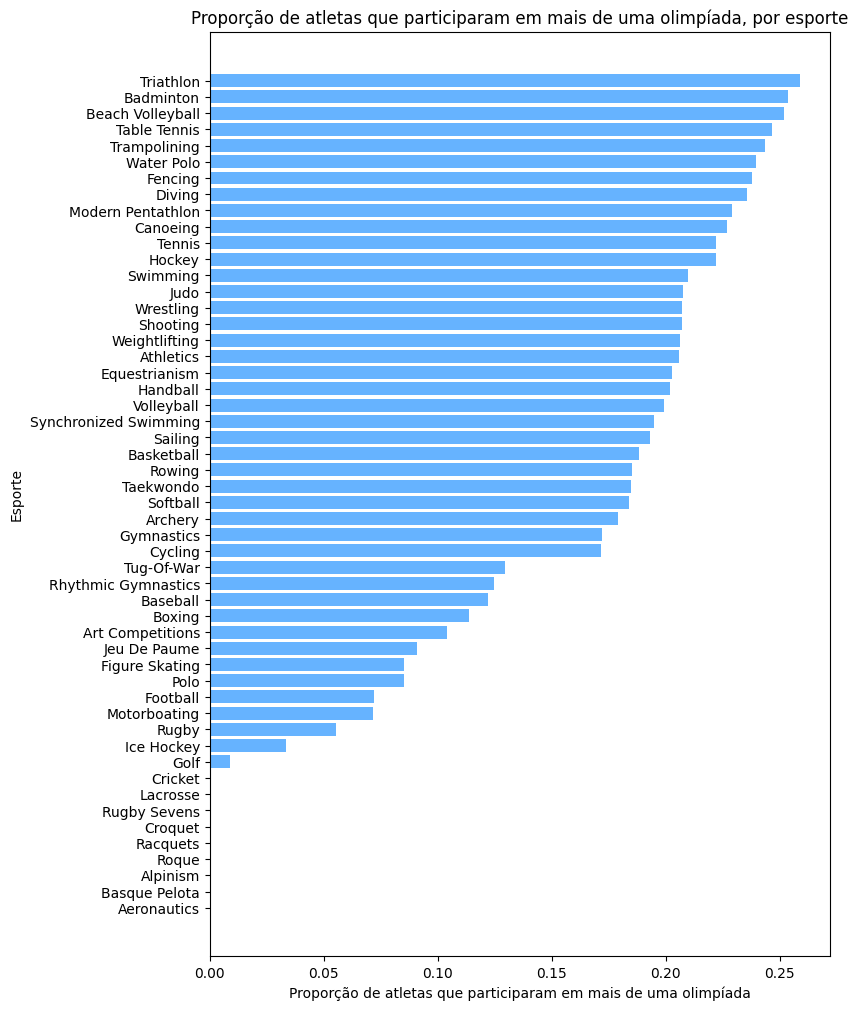

In [343]:
# Ordenar a tabela para melhor visualização
tabela_proporcao_final_sorted = tabela_proporcao_final.sort_values('Proporção', ascending=False)

# Plotar gráfico de barras horizontais para a proporção de atletas com múltiplas edições por esporte
plt.figure(figsize=(8, 12))
plt.barh(tabela_proporcao_final_sorted['Esporte'], tabela_proporcao_final_sorted['Proporção'], color='#66b3ff')
plt.xlabel('Proporção de atletas que participaram em mais de uma olimpíada')
plt.ylabel('Esporte')
plt.title('Proporção de atletas que participaram em mais de uma olimpíada, por esporte')
plt.gca().invert_yaxis()  # Inverter a ordem dos esportes para que o maior valor fique no topo
plt.show()


Para responder a pergunta sobre o fato ter ou não havido algum atleta que já competiu em mais de um esporte e quantos são eles, caso seja positiva, faço a pesquisa abaixo:

In [344]:
# Contar o número de esportes únicos para cada atleta
esportes_por_atleta = df.groupby('ID')['Sport'].nunique().reset_index()

# Filtrar atletas que participam de mais de um esporte
atletas_multiesporte = esportes_por_atleta[esportes_por_atleta['Sport'] > 1]

# Exibir o número de atletas que participam de mais de um esporte
print('Número de atletas que participaram em mais de 1 esporte:')
print(atletas_multiesporte.shape[0])

# Calcula o número máximo de esportes por um mesmo atleta
print('Número máx de esportes praticados por um mesmo atleta:')
df.groupby('ID')['Sport'].nunique().max()


Número de atletas que participaram em mais de 1 esporte:
535
Número máx de esportes praticados por um mesmo atleta:


4

Descubro que 535 atletas já participaram em mais de 1 esporte e que o número máximo de esportes por um mesmo atleta é 4.

##Participação das mulheres e homens ao longo dos anos


In [345]:
#Buscando por valores nulos por ID único
atletas_sex_null = df.loc[df['ID'].unique(), 'Sex'].isnull().sum()

print( f'{atletas_sex_null} atletas não tem dados sobre o sexo' )

0 atletas não tem dados sobre o sexo


Comecei a análise fazendo a separação dos dados entre homens e mulheres:

In [346]:
df_homem = df[df['Sex'] == 'M']
df_mulher = df[df['Sex'] == 'F']

Iniciei a análise pelos homens:

In [347]:
df_homem.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
6,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN


Fiz um gráfico de linha para ver ao longo do tempo como se dá a participação masculina:

Text(0.5, 1.0, 'Variação do número de homens ao longo do tempo')

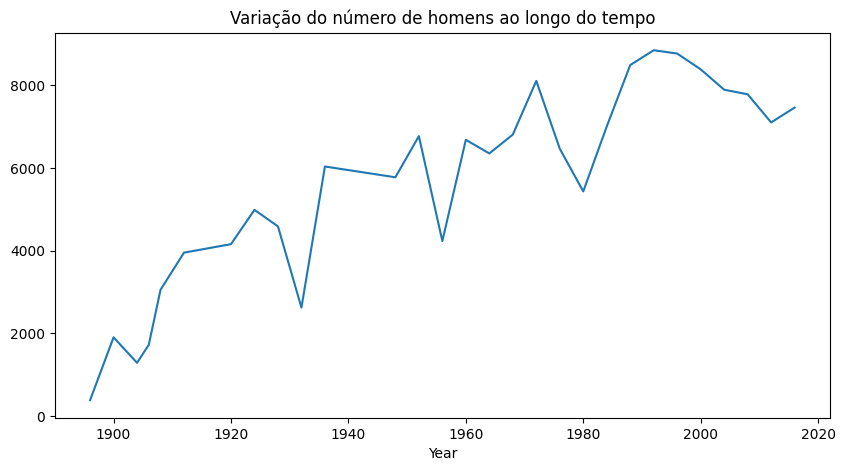

In [348]:
# Gráfico com a variação do número de homens ao longo do tempo
part = df_homem.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(10, 5))
part.loc[:,'M'].plot()
plt.title('Variação do número de homens ao longo do tempo')

A curva do gráfico dos homens tem a peculiaridade de ter picos negativos em uma distância de tempo bem homogênea entre si.

De uma maneira geral o número de homens teve uma crescente ao longo dos anos mas desde as últimas 3 décadas começou a a diminuir.

Text(0.5, 1.0, 'Variação do número de mulheres ao longo do tempo')

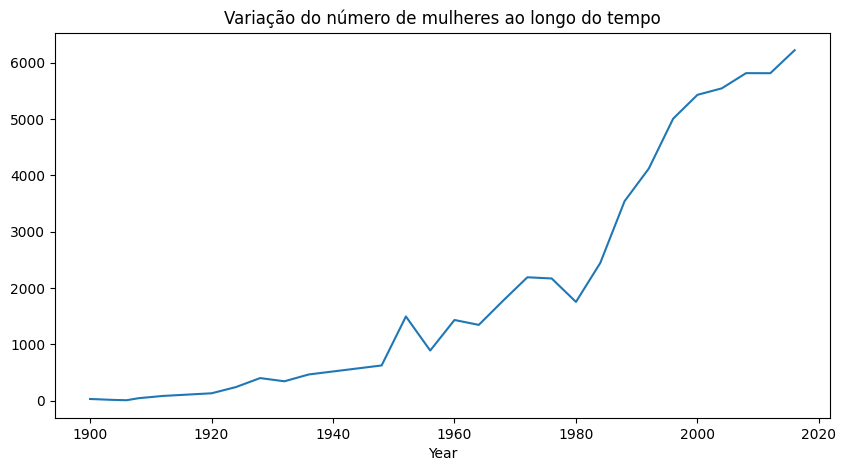

In [349]:
part = df_mulher.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(10, 5))
part.loc[:,'F'].plot()
plt.title('Variação do número de mulheres ao longo do tempo')

O número de mulheres teve um aumento gradual ao longo do tempo com uma aceleração a partir da década de 80.

O número de mulheres continua com uma tendência de aumento.

## A idade dos atletas e sua influência nos dados

In [350]:
# Buscando por valores nulos
valores_nulos = df.loc[:, 'Age'].isnull().sum()

if valores_nulos == 0:
  print("Não há valores nulos.")
else:
  print(f"{valores_nulos} valores nulos encontrados.")

9189 valores nulos encontrados.


Existem 9189 valores nulos.

In [351]:
#Buscando por valores nulos por ID único
atletas_age_null = df.loc[df['ID'].unique(), 'Age'].isnull().sum()

print( f'{atletas_age_null} atletas não tem dados de idade' )

4810 atletas não tem dados de idade


Quando tratar os dados, devo levar isso em consideração, 24% das linhas tem dados faltantes.

Para visualizar a a variação da idade dos atletas ao longo do tempo, optei por alinhar vários boxplots, 1 para cada ano, para que assim tenha uma visão mais detalhada sobre as características de um ano em relação aos outros.

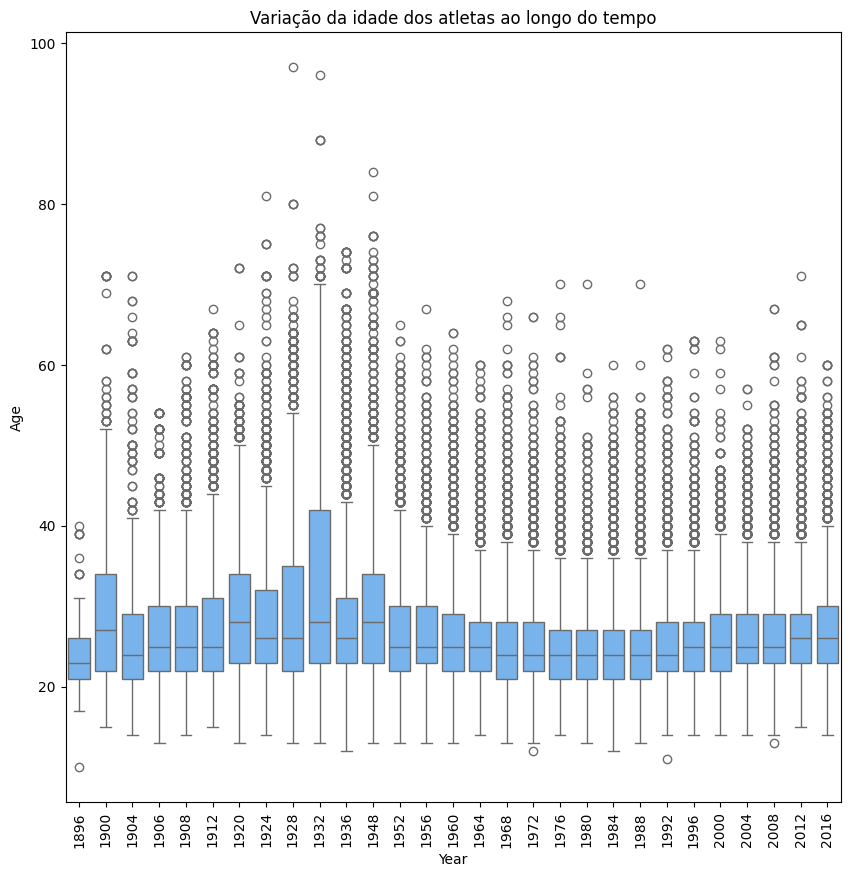

In [352]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Year', y='Age', data=df_homem, color='#66b3ff')  # Use argumentos nomeados para x e y
plt.title('Variação da idade dos atletas ao longo do tempo')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.show()

A distribuição dos homens é bem parecida, principalmente a partir de 1952.


Me chamou bastante atenção o fato de ter pessoas muitos homens idosos (outliers) participando de jogos olímpicos. Irei me aprofundar nisso abaixo:

In [353]:
df_homem.loc[df_homem['Age'] > 80]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
8017,5146,George Denholm Armour,M,84.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
51105,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
51106,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
51107,31173,Thomas Cowperthwait Eakins,M,88.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
81200,49663,Winslow Homer,M,96.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
127244,77710,Robert Tait McKenzie,M,81.0,NaN,NaN,Canada,CAN,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN
194356,118789,Louis Tauzin,M,81.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN
211066,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


Analisando quem eram os atletas homens com mais de 80 anos, descobri que todos eram participantes da competição de Artes Plásticas, o que faz sentido visto que é uma categoria que não demanda muito fisicamente do atleta.

Por curiosidade, pesquisei quem era o outlier mais jovem:

In [354]:
#df_homem['Age'].min()
#descobri que a menor idade é 10 anos

df_homem.loc[df_homem['Age'] < 11]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
117228,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


Fiz o mesmo gráfico utilizando os dados das atletas mulheres:

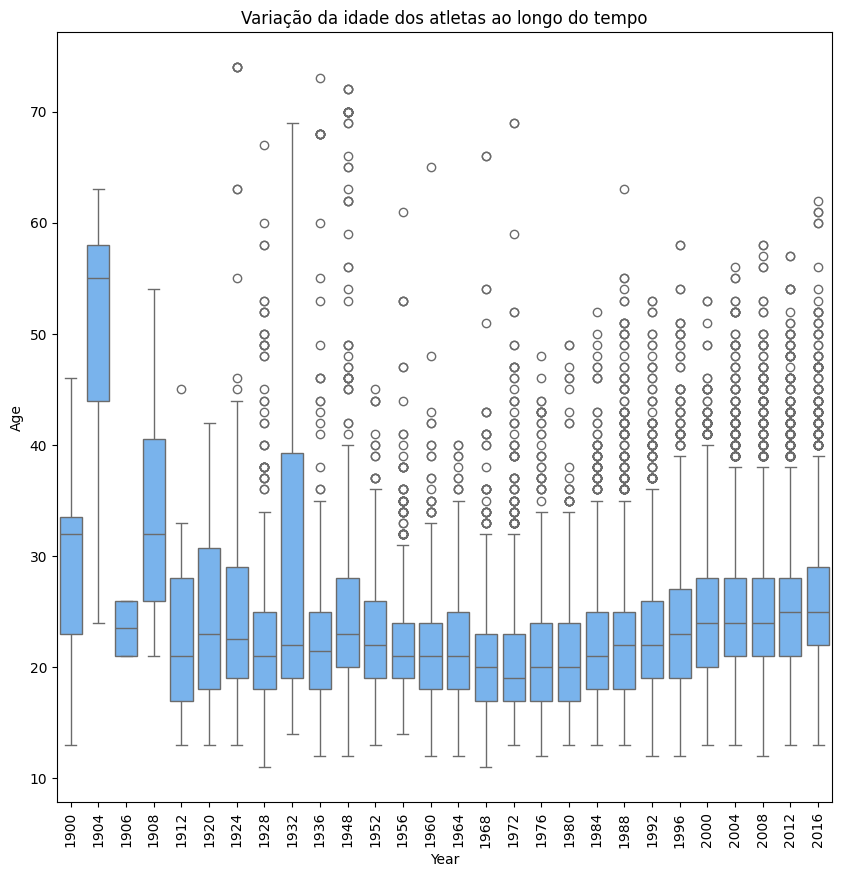

In [355]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Year', y='Age', data=df_mulher, color='#66b3ff')  # Use argumentos nomeados para x e y
plt.title('Variação da idade dos atletas ao longo do tempo')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.show()

A distribuição feminina sofre um pouco mais discrepâncias nos primeiros anos, o que é muito natural dado que existem pouquíssimas participantes nestas edições e qualquer estatística gerada é mais caricaturada.

In [356]:
df_mulher.loc[df_mulher['Age'] > 70]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
9401,6016,Winifred Marie Louise Austen (-Frick),F,72.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Graphic Arts",NaN
9402,6016,Winifred Marie Louise Austen (-Frick),F,72.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
9403,6016,Winifred Marie Louise Austen (-Frick),F,72.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
29576,18252,Anne Marie Carl-Nielsen (Brodersen-),F,73.0,NaN,NaN,Denmark,DEN,1936 Summer,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN
165890,101272,Ernestine Lonie Ernesta Robert-Mrignac,F,74.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN
165891,101272,Ernestine Lonie Ernesta Robert-Mrignac,F,74.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN
165892,101272,Ernestine Lonie Ernesta Robert-Mrignac,F,74.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN
165893,101272,Ernestine Lonie Ernesta Robert-Mrignac,F,74.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,NaN



Analisando quem eram as atletas mais idosas, descobri que também eram participantes da competição de Artes Plásticas. Abaixo pesquiso sobre as mais jovens.

In [357]:
df_mulher.loc[df_mulher['Age'] <= 11]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
65895,40129,Luigina Giavotti,F,11.0,NaN,NaN,Italy,ITA,1928 Summer,1928,Summer,Amsterdam,Gymnastics,Gymnastics Women's Team All-Around,Silver
207282,126307,Liana Vicens,F,11.0,158.0,50.0,Puerto Rico,PUR,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Women's 100 metres Breaststroke,NaN
207283,126307,Liana Vicens,F,11.0,158.0,50.0,Puerto Rico,PUR,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Women's 200 metres Breaststroke,NaN
207284,126307,Liana Vicens,F,11.0,158.0,50.0,Puerto Rico,PUR,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Women's 200 metres Individual Medley,NaN
207285,126307,Liana Vicens,F,11.0,158.0,50.0,Puerto Rico,PUR,1968 Summer,1968,Summer,Mexico City,Swimming,Swimming Women's 4 x 100 metres Medley Relay,NaN


As 2 mulheres mais jovens a participar tem 11 anos e o homem, 10. Destes, 2 dos atletas (1 homem e 1 mulher) competiram em ginástica olímpica e 1 mulher em natação.

O ano de 1904 teve um comportamento muito diferente dos outros no gráfico, irei investigar:

In [358]:
df_mulher.loc[df_mulher['Year'] == 1904]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
37144,22877,Emma C. Cooke,F,55.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Silver
37145,22877,Emma C. Cooke,F,55.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,Silver
82357,50366,"Matilda ""Lida"" Howell (Scott-)",F,44.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Gold
82358,50366,"Matilda ""Lida"" Howell (Scott-)",F,44.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,Gold
82359,50366,"Matilda ""Lida"" Howell (Scott-)",F,44.0,NaN,NaN,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Team Round,Gold
157204,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Bronze
157205,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,Bronze
157206,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Team Round,Gold
194545,118921,"Leonora Josephine ""Leonie"" Taylor",F,NaN,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,NaN
194546,118921,"Leonora Josephine ""Leonie"" Taylor",F,NaN,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,NaN


Irei agora remover os IDs duplicados para contabilizar o número de atletas de maneira mais fácil.

In [359]:
df_aux_mulher = df_mulher.loc[df_mulher['Year'] == 1904]
df_aux_mulher.drop_duplicates(subset='ID')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
37144,22877,Emma C. Cooke,F,55.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Silver
82357,50366,"Matilda ""Lida"" Howell (Scott-)",F,44.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Gold
157204,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Bronze
194545,118921,"Leonora Josephine ""Leonie"" Taylor",F,NaN,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,NaN
194548,118922,Mabel Caroline Taylor (-Brummel),F,24.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,NaN
215908,131533,Emily Woodruff (Smiley-),F,58.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,NaN



- Cruzando este dado com o do número de participantes por ano, descobri que apenas 6 mulheres competiram neste ano. Acredito que a anomalia no gráfico se justifique pelo fato da amostragem ser muito pequena para gerar estatísticas razoáveis.
- O ano de 1932 tem um comportamento muito diferente dos outros tanto para os homens quanto para as mulheres. Voltando ao dado sobre o número de atletas incritos por olimpíada, vemos um pico negativo nesse ano. Fiz uma pesquisa e descobri que dos 46 países que participaram da edição anterior, apenas 37 foram nesta. Isto em virtude da Grande Depressão.

##A altura e peso de um medalhista olímpico

Como nesse atributo especificamente um valor null não é um dado faltante, já que significa que o atleta não foi medalhista, começo criando um dataset com todos os medalhistas usando como critério para essa seleção as colunas que não tem nulls nesse atributo.

In [360]:
# medalhistas mulheres e homens

medalhistas = df[df['Medal'].notnull()]
medalhistas.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
12,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
13,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


 Em seguida retiro todos os IDs duplicados em um mesmo ano para que um mesmo atleta não seja contabilizado 2 vezes. Optei por manter 1 ocorrência em cada ano que o atleta competiu porque um mesmo atleta pode voltar a competir com uma altura e peso diferentes e em diferentes modalidades, logo, essa variação pode ser um fator importante no fato dele ganhar mais medalhas ou não.

In [361]:
medalhistas_unicos = medalhistas.drop_duplicates(subset=['Year', 'ID'])
medalhistas_altura_notnull = medalhistas_unicos.dropna(subset=['Height'])

In [362]:
medalhistas_altura_notnull['Height'].describe()

,Height
count,23332.000000
mean,178.236242
std,11.167833
min,136.000000
25%,170.000000
50%,178.000000
75%,185.000000
max,223.000000


Fiz um boxplot das alturas dos medalhistas agregadas por ano para visualizar melhor as estatísticas:

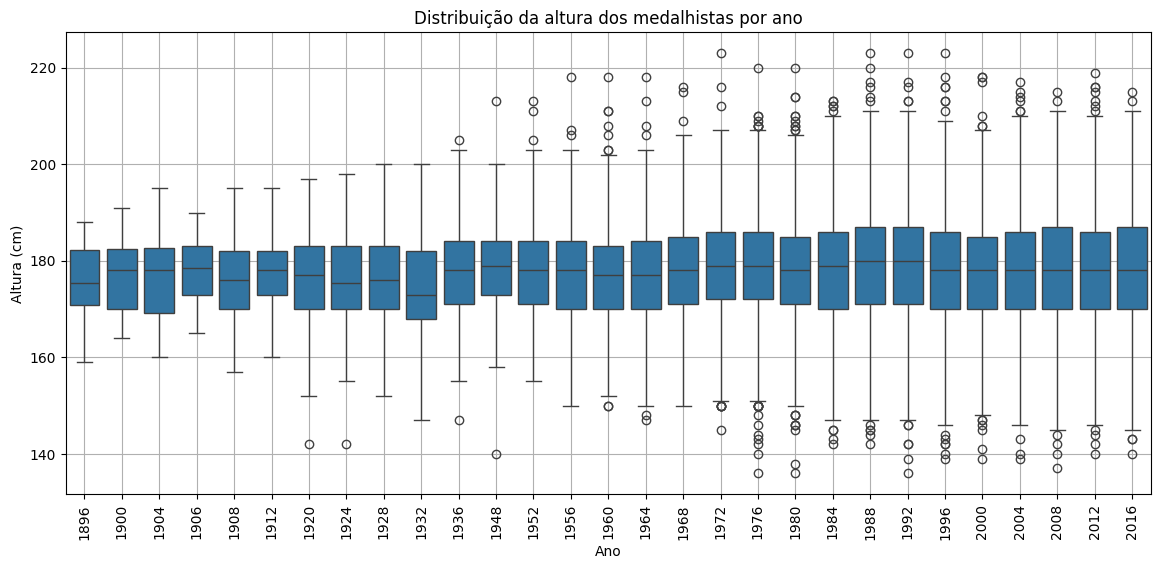

In [363]:
# Plotar o gráfico de boxplots para altura por ano
plt.figure(figsize=(14, 6))
sns.boxplot(x='Year', y='Height', data=medalhistas_altura_notnull)

# Configurações do gráfico
plt.xlabel('Ano')
plt.ylabel('Altura (cm)')
plt.title('Distribuição da altura dos medalhistas por ano')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


A altura dos medalhistas manteve-se relativamente constante ao longo do tempo em termos de mediana, mas a variabilidade parece ter aumentado nas últimas décadas. Isso pode ser por que o número de participantes e, principalmente, de esportes foi aumentando com o tempo e junto deles a variação de características físicas dos atletas, visto que em geral cada esporte tem um corpo "ideal".

A presença de outliers é justificada pelo mesmo motivo.

Para descobrir se existe uma grande diferença entre os homens e mulheres nesse aspecto, separarei em 2 grupos de acordo com o sexo:

In [364]:
# medalhistas mulheres

medalhistas_f = medalhistas_altura_notnull[medalhistas_altura_notnull['Sex'] == 'F']
medalhistas_f.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
33,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
54,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze
99,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze


Para visualizar como a altura se comporta ao longo dos anos, criei um gráfico de linhas, iniciando os estudos pelas mulheres:

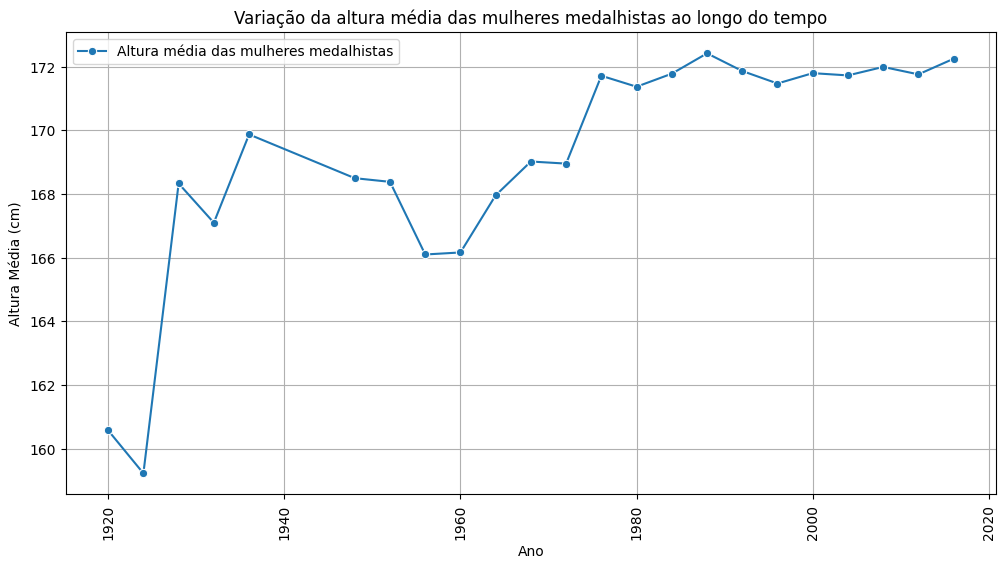

In [365]:
# Calcular a média da altura por ano
altura_media_f_por_ano = medalhistas_f.groupby('Year')['Height'].mean().reset_index()

# Plotar o gráfico de linha para altura média por ano (mulheres)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Height', data=altura_media_f_por_ano, marker='o', label='Altura média das mulheres medalhistas')

# Configurações do gráfico
plt.xlabel('Ano')
plt.ylabel('Altura Média (cm)')
plt.title('Variação da altura média das mulheres medalhistas ao longo do tempo')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

- A média da altura das mulheres medalhistas teve uma crescente inicial, depois sofreu turbulências, as quais teria que pesquisar a história de cada olimpíada para saber o porque, e desde 1976 se estabilizou entre 1,71m e 1,73m.
- Curiosamente, nas 2 primeiras edições as mulheres medalhistas eram bem baixas, ambas commenos de 1,61m. Isso mostra que desde o início dos jogos, uma mulher medalhista cresceu 10cm de altura.
- Esse aumento provavelmente se dá ao fato de que muitos esportes foram incluídos ao longo dos anos. Estes favorecem tanto corpos pequenos como grandes, mas não de igual maneira, por isso, para se obter algum insight mais preciso precisaria ser feito um estudo de altura por sexo e esporte, para que assim uma comparação mais justa fosse feita. Isso está fora do escopo desse projeto.

Começo um estudo sobre os homens:

In [366]:
# medalhistas homens

medalhistas_m = medalhistas_altura_notnull[medalhistas_altura_notnull['Sex'] == 'M']
medalhistas_m.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
15,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
24,17,Paavo Johannes Aaltonen,M,32.0,175.0,64.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze
42,30,Pepijn Aardewijn,M,26.0,189.0,72.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver


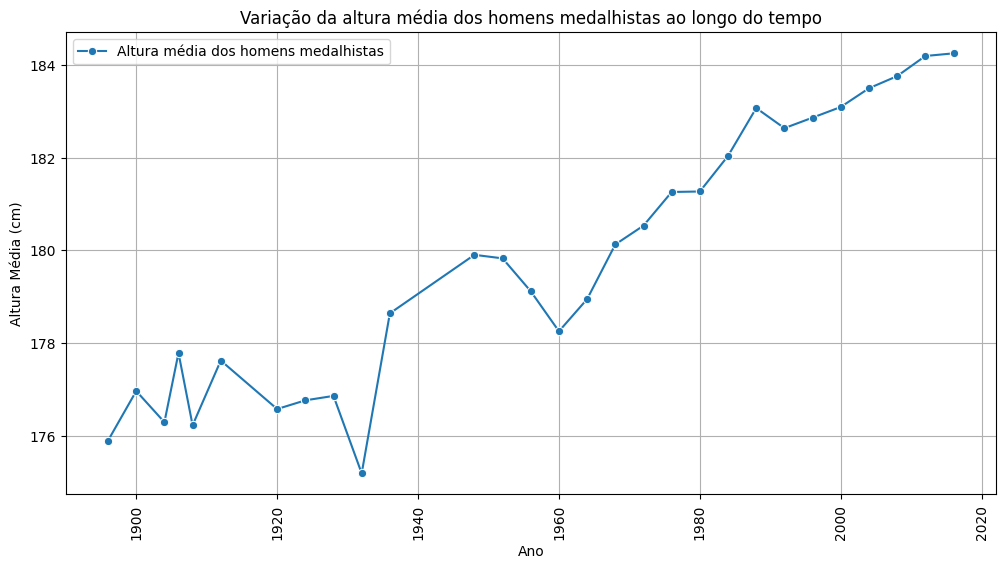

In [367]:
# Calcular a média da altura por ano
altura_media_m_por_ano = medalhistas_m.groupby('Year')['Height'].mean().reset_index()

# Plotar o gráfico de linha para altura média por ano (mulheres)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Height', data=altura_media_m_por_ano, marker='o', label='Altura média dos homens medalhistas')

# Configurações do gráfico
plt.xlabel('Ano')
plt.ylabel('Altura Média (cm)')
plt.title('Variação da altura média dos homens medalhistas ao longo do tempo')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

É curioso como os homens e mulheres tem um período de turbulência no meio do gráfico. Como os jogos olimpícos se modificaram de maneira muito próxima à sociedade, sofrendo interferência de costumes, crises econômicas, guerras, dissolução de países, pandemias. Por isso para de fato se obter uma precisão melhor das análises, seria necessário fazer um estudo multidisciplinar. Elaborarei isso melhor na conclusão do projeto. Por agora, se vê que a altura dos homens também aumentou ao longo dos anos, assim como as mulheres. Entretanto ela continua sofrendo um discreto aumento.

##Estudando os Nulls

Existem muitos nulls, principalmente quanto a altura e peso dos participantes. Desenvolvi a hipótese de que o número de nulls pode ter relação com a edição das olimpíadas, visto que até agora, em praticamente toda vez que esbarrei com os dados de um atleta de uma edição mais antiga, esses valores eram faltantes. Para responder à essa dúvida, criei uma tabela agrupando por ano o número de nulls de cada categoria:

In [368]:
# Selecionar as colunas de interesse
colunas = ['Year', 'ID', 'Sex', 'Age', 'Height', 'Weight']

# Filtrar o DataFrame para as colunas desejadas e remover duplicatas de 'ID' por 'Year'
df_unico_por_ano = df[colunas].drop_duplicates(subset=['Year', 'ID'])

# Contar os valores nulos por coluna para cada ano, considerando apenas IDs únicos
contagem_nulos_por_ano = df_unico_por_ano.groupby('Year').agg({
    'Sex': lambda x: x.isnull().sum(),
    'Age': lambda x: x.isnull().sum(),
    'Height': lambda x: x.isnull().sum(),
    'Weight': lambda x: x.isnull().sum()
}).reset_index()

# Contar o número de IDs únicos por ano
contagem_ids_unicos = df_unico_por_ano.groupby('Year')['ID'].nunique().reset_index(name='Número de atletas')

# Mesclar a contagem de IDs únicos ao DataFrame contagem_nulos_por_ano
contagem_nulos_por_ano = pd.merge(contagem_ids_unicos, contagem_nulos_por_ano, on='Year')

# Reorganizar as colunas para ter a contagem de IDs únicos entre 'Year' e 'Sex'
contagem_nulos_por_ano

,Year,Número de atletas,Sex,Age,Height,Weight
0,1896,176,0,104,162,162
1,1900,1224,0,586,1172,1184
2,1904,650,0,149,564,577
3,1906,841,0,449,750,761
4,1908,2024,0,487,1777,1731
5,1912,2409,0,93,2042,2066
6,1920,2676,0,553,2237,2360
7,1924,3256,0,700,2672,2766
8,1928,3247,0,636,2644,2747
9,1932,1922,0,241,1203,1590


Em seguida percebi que o mais importante para saber o quanto esses nulls representam para o dataset é a proporção destes em relação ao conjunto de dados. Como as características de altura, peso e idade variam ao longo dos anos, fiz uma tabela agrupando por ano a proporção entre o número total de atletas participantes deste ano e o número de null, para assim saber a proporção que essa falta de informação representa.

In [369]:
# Selecionar as colunas de interesse
colunas = ['Year', 'ID', 'Sex', 'Age', 'Height', 'Weight']

# Filtrar o DataFrame para as colunas desejadas e remover duplicatas de 'ID' por 'Year'
df_unico_por_ano = df[colunas].drop_duplicates(subset=['Year', 'ID'])

# Contar o número de IDs únicos por ano
contagem_ids_unicos = df_unico_por_ano.groupby('Year')['ID'].nunique().reset_index(name='Contagem de IDs Únicos')

# Contar os valores nulos por coluna para cada ano e calcular a proporção em relação aos IDs únicos
proporcao_nulos_por_ano = df_unico_por_ano.groupby('Year').agg({
    'Sex': lambda x: x.isnull().sum(),
    'Age': lambda x: x.isnull().sum(),
    'Height': lambda x: x.isnull().sum(),
    'Weight': lambda x: x.isnull().sum()
}).reset_index()

# Mesclar a contagem de IDs únicos ao DataFrame de proporções de nulos
proporcao_nulos_por_ano = pd.merge(contagem_ids_unicos, proporcao_nulos_por_ano, on='Year')

# Calcular a proporção de valores nulos para cada coluna
proporcao_nulos_por_ano['Sex'] = proporcao_nulos_por_ano['Sex'] / proporcao_nulos_por_ano['Contagem de IDs Únicos']
proporcao_nulos_por_ano['Age'] = proporcao_nulos_por_ano['Age'] / proporcao_nulos_por_ano['Contagem de IDs Únicos']
proporcao_nulos_por_ano['Height'] = proporcao_nulos_por_ano['Height'] / proporcao_nulos_por_ano['Contagem de IDs Únicos']
proporcao_nulos_por_ano['Weight'] = proporcao_nulos_por_ano['Weight'] / proporcao_nulos_por_ano['Contagem de IDs Únicos']

# Reorganizar as colunas para ter a contagem de IDs únicos entre 'Year' e as proporções
proporcao_nulos_por_ano = proporcao_nulos_por_ano[['Year', 'Contagem de IDs Únicos', 'Sex', 'Age', 'Height', 'Weight']]

# Exibir o DataFrame
proporcao_nulos_por_ano.sort_values('Year', ascending=False)


,Year,Contagem de IDs Únicos,Sex,Age,Height,Weight
28,2016,11179,0.0,0.000000,0.014760,0.017980
27,2012,10517,0.0,0.000000,0.014738,0.026719
26,2008,10899,0.0,0.000092,0.012662,0.012386
25,2004,10557,0.0,0.000000,0.003031,0.003126
24,2000,10647,0.0,0.000094,0.010613,0.010895
23,1996,10339,0.0,0.000484,0.135119,0.128929
22,1992,9386,0.0,0.003835,0.197315,0.192734
21,1988,8454,0.0,0.010646,0.032884,0.030282
20,1984,6798,0.0,0.024419,0.052663,0.052221
19,1980,5259,0.0,0.031755,0.040502,0.039171


Para ajudar a interpretar os dados gerados, criei um gráfico de linhas para cada um.

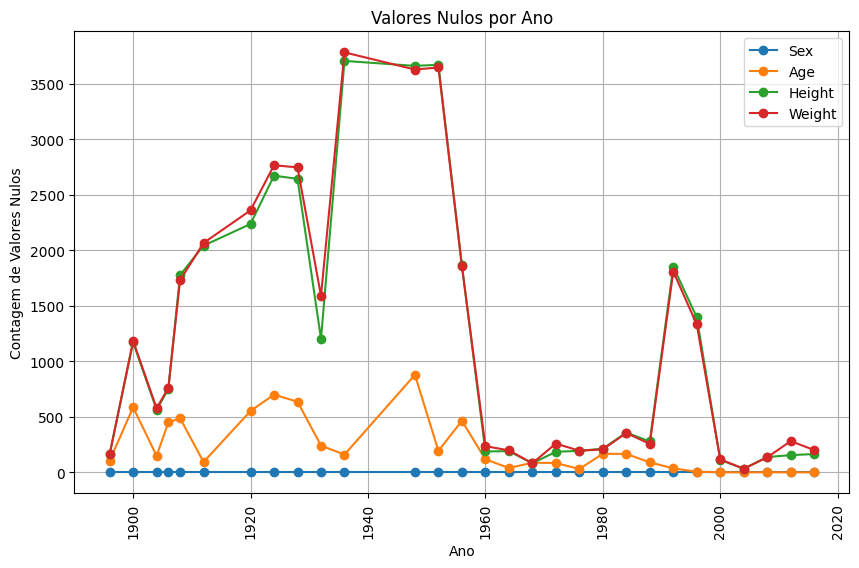

In [370]:
# Plotar gráfico de linhas para os valores nulos por ano
plt.figure(figsize=(10, 6))

# Plotar uma linha para cada coluna de interesse
plt.plot(contagem_nulos_por_ano['Year'], contagem_nulos_por_ano['Sex'], label='Sex', marker='o')
plt.plot(contagem_nulos_por_ano['Year'], contagem_nulos_por_ano['Age'], label='Age', marker='o')
plt.plot(contagem_nulos_por_ano['Year'], contagem_nulos_por_ano['Height'], label='Height', marker='o')
plt.plot(contagem_nulos_por_ano['Year'], contagem_nulos_por_ano['Weight'], label='Weight', marker='o')

# Configurações do gráfico
plt.xlabel('Ano')
plt.ylabel('Contagem de Valores Nulos')
plt.title('Valores Nulos por Ano')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.show()


Observo que apenas a partir da olimpíada de 1960 os dados de peso, altura e idade dos participantes começaram a ser cadastrados eficientemente. Não consegui descobrir em minhas pesquisas o porque disso, mas deve ter sido algo que envolveu uma mudança na política de gestão dos dados dos atletas.

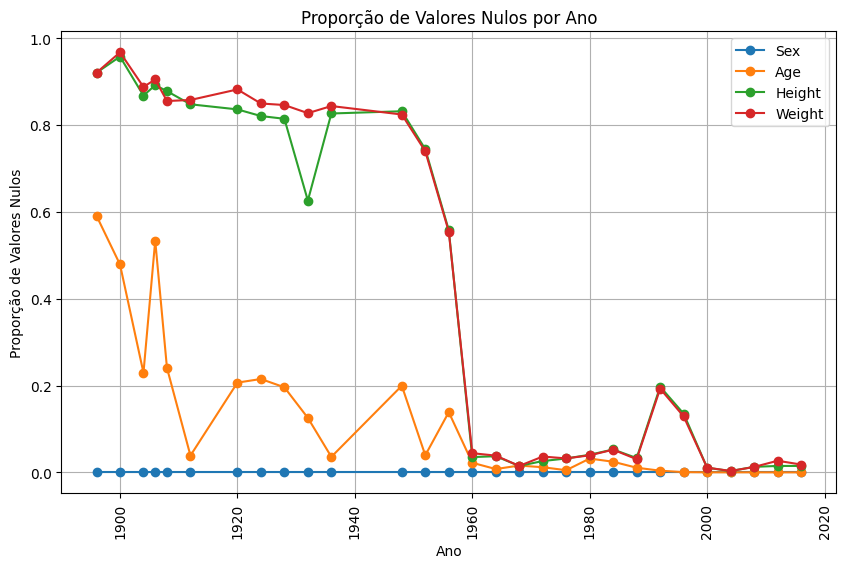

In [371]:
# Plotar gráfico de linhas para as proporções de valores nulos por ano
plt.figure(figsize=(10, 6))

# Plotar uma linha para cada coluna de proporção
plt.plot(proporcao_nulos_por_ano['Year'], proporcao_nulos_por_ano['Sex'], label='Sex', marker='o')
plt.plot(proporcao_nulos_por_ano['Year'], proporcao_nulos_por_ano['Age'], label='Age', marker='o')
plt.plot(proporcao_nulos_por_ano['Year'], proporcao_nulos_por_ano['Height'], label='Height', marker='o')
plt.plot(proporcao_nulos_por_ano['Year'], proporcao_nulos_por_ano['Weight'], label='Weight', marker='o')

# Configurações do gráfico
plt.xlabel('Ano')
plt.ylabel('Proporção de Valores Nulos')
plt.title('Proporção de Valores Nulos por Ano')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.show()


- Se olharmos unicamente o gráfico de linhas que mostra a contagem de nulls ao longo do tempo, um grande erro pode ser interpretado, de que não há muitos nulls nas primeiras olimpíadas. Entretanto, quando fazemos o mesmo gráfico trocando a contagem de nulls pela proporção entre nulls e número de atletas que participaram de determinada edição, a informação realmente relevante se revela. Mais de 80% dos atletas não tem informações de peso e altura até 1928.
- Por algum motivo a olimpíada de 1992 tem um pico de falta de dados de altura e peso. Vou tentar identificar algum padrão criando a tabela abaixo:

In [372]:
df_1992 = df.loc[df['Year'] == 1992, :]

df_1992_null = df_1992.loc[df_1992['Height'].isnull(), :]
df_1992.loc[df_1992['Height'].isnull(), :]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
98,64,M'Bairo Abakar,M,31.0,NaN,NaN,Chad,CHA,1992 Summer,1992,Summer,Barcelona,Judo,Judo Men's Half-Middleweight,NaN
123,83,Carlos Arturo Abarza Chavez,M,22.0,NaN,NaN,Chile,CHI,1992 Summer,1992,Summer,Barcelona,Shooting,Shooting Mixed Skeet,NaN
231,162,Hosam Abdallah,M,25.0,NaN,NaN,Egypt,EGY,1992 Summer,1992,Summer,Barcelona,Handball,Handball Men's Handball,NaN
241,164,Maged Abdallah,M,22.0,NaN,NaN,Egypt,EGY,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Foil, Individual",NaN
263,182,Gamal Amin Abdel Ghani,M,29.0,NaN,NaN,Egypt,EGY,1992 Summer,1992,Summer,Barcelona,Hockey,Hockey Men's Hockey,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222361,135430,Zundui Naran,M,25.0,NaN,NaN,Mongolia,MGL,1992 Summer,1992,Summer,Barcelona,Cycling,Cycling Men's 100 kilometres Team Time Trial,NaN
222404,135475,Liliana Teresa Zurowski,F,36.0,NaN,NaN,Austria,AUT,1992 Summer,1992,Summer,Barcelona,Handball,Handball Women's Handball,NaN
222439,135490,Irina Lvovna Zuykova,F,34.0,NaN,NaN,Unified Team,EUN,1992 Summer,1992,Summer,Barcelona,Equestrianism,"Equestrianism Mixed Dressage, Individual",NaN
222440,135490,Irina Lvovna Zuykova,F,34.0,NaN,NaN,Unified Team,EUN,1992 Summer,1992,Summer,Barcelona,Equestrianism,"Equestrianism Mixed Dressage, Team",NaN


In [373]:
# Agrupar por 'Sport' e contar o número de ocorrências nulas em cada grupo
df_1992_null_grouped = df_1992_null.groupby('Team').size().reset_index(name='Contagem')

# Ordenar pelo número de nulos de forma decrescente
df_1992_null_grouped_sorted = df_1992_null_grouped.sort_values(by='Contagem', ascending=False)

# Exibir o DataFrame resultante
df_1992_null_grouped_sorted


,Team,Contagem
142,Spain,178
139,South Korea,175
154,Unified Team,135
125,Romania,124
8,Australia,104
...,...,...
7,Aruba,1
130,Samoa,1
137,Solomon Islands,1
11,Bahrain,1


- Não identifiquei nenhum padrão. Fiquei sem resposta para essa questão. Minha hipótese era que esses nulls viriam de algum país específico, mas ela se provou falsa. A hipótese que me resta é que deva ter ocorrido algum evento burocrático naquele momento que fez com que esses dados não fossem captados.
- Durante a pesquisa descobri que os países não precisam obrigatoriamente divulgar os dados de altura, peso e idade dos atletas. Uma curiosidade descoberta é que hoje em dia as federações em alguns casos optam por não divulgá-los para evitar que os atletas sofram body shaming.

##Um possível modelo de ML

Após estudar os dados, cheguei à conclusão de que poderia propor a criação de uma modelo de ML que, a partir dos dados de altura e peso de um atleta, previsse se ele tem ou não chances de ser um medalhista olímpico na próxima olimpíada. Sei que outros dados não incluídos no dataset sejam até mais importante, como os relativos a colocação dele nas competições menores que participou recentemente, se ele têm alguma lesão ou não, dentre outros. Mas como esse é um projeto acadêmico, focarei nessa hipótese: de que a informação produzida pelo modelo tem alguma relevância ainda assim.

Esse é um problema de classificação supervisionada porque a classe alvo é categórica discreta.

##Tratamento dos nulls para a criação do modelo

Os atributos de peso e altura tem muitos nulls, ambos com mais de 25%.

Entretanto, é possível ver que existe um padrão relativo entre a altura e peso de medalhistas dentro de alguns esportes. Sei que isso não ocorre em todos, mas tenho a hipótese de que esses são esportes onde o peso e altura de um medalhista não tem grande correlação com o fato de que que ele irá obter ou não uma medalha, logo esse modelo criado não contribuiria muito de qualquer maneira nesses casos.

Como existe esse padrão físico, optei por criar dados sintéticos a partir da mediana da altura e peso dos atletas dentro de um mesmo esporte. Acredito que nesse caso essa é a segunda melhor alternativa.

Digo que é a segunda  porque acho que a melhor maneira de se criar esses dados seria construindo um modelo de ML que tratasse melhor as peculiaridades na variação de altura e peso de alguns esportes específicos. Por exemplo temos o volei, que apesar de ser praticado por atletas muito altos, tem um líbero em toda equipe, que é alguém mais baixo. O basquete segue essa mesma lógica. Isso levanta uma outra questão, talvez o ideal seria conseguir obter o dado da função exercida pelo atleta em determinado esporte.

Fiquei em dúvida se excluiria desse trabalho o parágrafo anterior e este, porque ao elaborar melhor as alternativas enquanto escrevia, derrubei minhas teses acima. Optei por deixar porque acredito que esse storytelling colabora para o entendimento dos desafios de um projeto como esse. Chego agora à conclusão de que na verdade seria importante também segmentar pela modalidade, porque um atleta de boxe, por exemplo, pode ser peso leve ou pesado, e é evidente que seu peso e altura afetam drasticamente a possibilidade de ser um medalhista.

Entretanto, como existem muitas modalidades que foram descontinuadas ao longo dos anos, assim como também tem várias que surgiram há pouco tempo, e por isso em muitos casos não haverá dados o suficientes para se treinar o modelo, chego à conclusão de que nesse trabalho irei desprezar essa informação e voltarei à minha primeira alternativa, criar dados sintéticos a partir da mediada da altura e peso dos atletas dentro de um mesmo esporte.

Utilizarei a mediana exatamente para excluir esses outliers dentro de um mesmo esporte, e também os que surgem ao longo dos anos, no começo das olimpíadas todas as mulheres medalhistas tem por volta de 1,60 de altura, por exemplo. Dessa maneira o modelo funcionará para o maior número de atletas praticantes de determinado esporte.

Para preservar o dataset inicial, irei começar criando um com o critério citado acima e depois o dividirei entre homens e mulheres.

In [374]:
# Criando o dataset
atletas_criterio = df.drop_duplicates(subset=['Year', 'ID'])

In [375]:
# Separando ele entre homens e mulheres
atletas_criterio_f = atletas_criterio[atletas_criterio['Sex'] == 'F']
atletas_criterio_m = atletas_criterio[atletas_criterio['Sex'] == 'M']

Crio os dados sintéticos usando a mediana das alturas dos atletas de acordo com o esporte que praticam.

In [376]:
# Imputar valores nulos em 'Height' com a mediana por grupo 'Sport'
atletas_criterio_f['Height'] = atletas_criterio_f.groupby('Sport')['Height'].transform(lambda x: x.fillna(x.median()))

# Imputar valores nulos em 'Weight' com a mediana por grupo 'Sport'
atletas_criterio_f['Weight'] = atletas_criterio_f.groupby('Sport')['Weight'].transform(lambda x: x.fillna(x.median()))

# Atribuir o DataFrame resultante a uma nova variável
atletas_dados_sinteticos_f = atletas_criterio_f

# Exibir o DataFrame resultante
atletas_dados_sinteticos_f.head(3)

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
<ipython-input-376-e8d39f8ec05c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atletas_criterio_f['Height'] = atletas_criterio_f.groupby('Sport')['Height'].transform(lambda x: x.fillna(x.median()))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctio

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,58.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
8,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN
9,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN


Confiro se existe algum null.

In [377]:
atletas_dados_sinteticos_f.loc[atletas_dados_sinteticos_f['Height'].isnull(), :]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
45597,27851,Mme. Desprs,F,NaN,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Croquet,"Croquet Mixed Singles, One Ball",NaN
50926,31057,"Harriet Pauline ""Hettie"" Dyhrenfurth (Heyman-)",F,43.0,NaN,NaN,Switzerland,SUI,1936 Summer,1936,Summer,Berlin,Alpinism,Alpinism Mixed Alpinism,Gold
58012,35364,Jeanne Marie Henriette Filleaul-Brohy (Hantjens-),F,33.0,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Croquet,"Croquet Mixed Singles, One Ball",NaN
68728,41857,"Sophia Hope Gorham (Hallowes-, -Compton)",F,26.0,NaN,NaN,Quicksilver-2,GBR,1908 Summer,1908,Summer,London,Motorboating,Motorboating Mixed B-Class (Under 60 Feet),NaN
144550,88258,Marie Pierrette Sophie Pauline Ohier,F,46.0,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Croquet,"Croquet Mixed Singles, One Ball",NaN


Continuam existindo 5 valores null na coluna height. Acredito que seja por que são esportes muito pouco praticados em olimpíadas e então talvez não exista nenhum dado para servir como base para o cálculo da mediana. Checo quais são os esportes com nulls:

In [378]:
df_aux = atletas_dados_sinteticos_f.loc[atletas_dados_sinteticos_f['Height'].isnull(), :]
df_aux['Sport'].unique()

array(['Croquet', 'Alpinism', 'Motorboating'], dtype=object)

Pesquiso os dados os atletas que o praticam:

In [379]:
atletas_dados_sinteticos_f.loc[atletas_dados_sinteticos_f['Sport'] == 'Croquet', :]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
45597,27851,Mme. Desprs,F,NaN,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Croquet,"Croquet Mixed Singles, One Ball",NaN
58012,35364,Jeanne Marie Henriette Filleaul-Brohy (Hantjens-),F,33.0,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Croquet,"Croquet Mixed Singles, One Ball",NaN
144550,88258,Marie Pierrette Sophie Pauline Ohier,F,46.0,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Croquet,"Croquet Mixed Singles, One Ball",NaN


In [380]:
atletas_dados_sinteticos_f.loc[atletas_dados_sinteticos_f['Sport'] == 'Alpinism', :]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
50926,31057,"Harriet Pauline ""Hettie"" Dyhrenfurth (Heyman-)",F,43.0,NaN,NaN,Switzerland,SUI,1936 Summer,1936,Summer,Berlin,Alpinism,Alpinism Mixed Alpinism,Gold


In [381]:
atletas_dados_sinteticos_f.loc[atletas_dados_sinteticos_f['Sport'] == 'Motorboating', :]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
68728,41857,"Sophia Hope Gorham (Hallowes-, -Compton)",F,26.0,NaN,NaN,Quicksilver-2,GBR,1908 Summer,1908,Summer,London,Motorboating,Motorboating Mixed B-Class (Under 60 Feet),NaN


A minha hipótese se prova correta. Não existe nenhum dado não null para ser usado como base para o cálculo das medianas.

Percebo que esse problema irá ocorrer mais vezes, em esportes que estavam presentas em poucas e antigas edições das olimpíadas, quando se coletava poucas vezes esses dados. Como o objetivo do modelo é predizer a chance de alguém ser medalhista na próxima olimpíada, mudarei os critérios de criação do dataset que será usado para treinar o modelo de ML.

####Critério atualizado para tratamento dos dados

Esse problema com os nulls me gerou uma reflexão. Não faz sentido manter no dataset tratado os esportes que claramente tem pouquísima chance de voltar a estar presentes nas próximas olimpíadas. Além disso, esportes de edições antigas tem muitos nulls nos dados, então qualquer informação gerada seria muito pobre.

Observando os dados já levantados nesse estudo, acho seguro utilizar o critério de que, se um esporte não foi praticado a partir da edição de 1960, não terá relevância. Nessa edição começou a ser cadastrado um maior número de informações de todos os atletas e além disso grande dos esportes iniciados a partir daí ainda se mantém presentes nas olimpíadas.

Antes disso, continuo colocando os valores sintéticos no grupo masculino.

In [382]:
# Imputar valores nulos em 'Height' com a mediana por grupo 'Sport'
atletas_criterio_m['Height'] = atletas_criterio_m.groupby('Sport')['Height'].transform(lambda x: x.fillna(x.median()))

# Imputar valores nulos em 'Weight' com a mediana por grupo 'Sport'
atletas_criterio_m['Weight'] = atletas_criterio_m.groupby('Sport')['Weight'].transform(lambda x: x.fillna(x.median()))

# Atribuir o DataFrame resultante a uma nova variável
atletas_dados_sinteticos_m = atletas_criterio_m

# Exibir o DataFrame resultante
atletas_dados_sinteticos_m.head(3)

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,178.0,73.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


Junto os 2 datasets com os dados sintéticos em um só

In [383]:
atletas_dados_sinteticos_merged = pd.concat([atletas_dados_sinteticos_m, atletas_dados_sinteticos_f], ignore_index=True)
atletas_dados_sinteticos_merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,178.0,73.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,182.0,95.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,184.0,78.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN


Monto uma lista com os esportes que não foram praticados a partir de 1960.


In [384]:
# Encontrar todos os esportes presentes no DataFrame
todos_os_esportes = atletas_dados_sinteticos_merged['Sport'].unique()

# Filtrar dados a partir de 1960
esportes_apos_1960 = atletas_dados_sinteticos_merged[atletas_dados_sinteticos_merged['Year'] >= 1960]['Sport'].unique()

# Encontrar esportes que não foram praticados a partir de 1960
esportes_antes_1960 = set(todos_os_esportes) - set(esportes_apos_1960)

# Exibir a lista de esportes que não foram praticados a partir de 1960
print(esportes_antes_1960)

{'Polo', 'Motorboating', 'Racquets', 'Jeu De Paume', 'Art Competitions', 'Rugby', 'Tug-Of-War', 'Cricket', 'Croquet', 'Figure Skating', 'Roque', 'Basque Pelota', 'Lacrosse', 'Ice Hockey', 'Alpinism', 'Aeronautics'}


Excluo do dataset todas as linhas relativas aos atletas desses esportes. E finalizo a criação dos dados sintéticos.

In [385]:
# Converter o conjunto de esportes que não foram praticados a partir de 1960 para uma lista
esportes_para_excluir = list(esportes_antes_1960)

# Filtrar o DataFrame original, excluindo as linhas com esses esportes
df_sintetico = atletas_dados_sinteticos_merged[~atletas_dados_sinteticos_merged['Sport'].isin(esportes_para_excluir)]

# Exibir as primeiras linhas do DataFrame resultante
df_sintetico.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,178.0,73.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,184.0,78.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN
5,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NaN


##Tratamento da classe 'Medal'


O atributo 'Medal' é a classe preditora do modelo. Como o objetivo é saber se o atleta ganhará ou não uma medalha, independente do tipo da medalha, irei tratá-la como uma variável categórica discreta, ou seja, não tem um hierarquia interna entre as medalhas. Para poder utilizar esse dado no modelo de ML, transformei toda medalha no número 1 e as não medalhas em 0.

In [386]:
df_sintetico_binario = df_sintetico

df_sintetico_binario['Medal_Binary'] = df_sintetico_binario['Medal'].notnull().astype(int)
df_sintetico_binario.head()

<ipython-input-386-e984275a3a55>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sintetico_binario['Medal_Binary'] = df_sintetico_binario['Medal'].notnull().astype(int)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_Binary
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0
2,3,Gunnar Nielsen Aaby,M,24.0,178.0,73.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,0
4,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,184.0,78.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,0
5,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NaN,0


Excluo a antiga coluna 'Medal' e confiro se funcionou

In [387]:
df_sintetico_binario = df_sintetico_binario.drop('Medal', axis=1)
df_sintetico_binario.loc[df_sintetico_binario['Medal_Binary'] > 0, :]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal_Binary
7,15,Arvo Ossian Aaltonen,M,30.0,184.0,78.0,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1
9,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,1
15,25,Alf Lied Aanning,M,24.0,168.0,63.0,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Free System",1
19,30,Pepijn Aardewijn,M,26.0,189.0,72.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,1
28,38,Karl Jan Aas,M,20.0,168.0,63.0,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Free System",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158851,135553,Galina Ivanovna Zybina (-Fyodorova),F,21.0,168.0,80.0,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Women's Shot Put,1
158852,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,1
158854,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,1
158856,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,1


Faço uma contagem dos valores da classe alvo para saber se está balanceada, já partindo do princípio que não estará, visto que são poucas as medalhas por olimpíada.

In [388]:
qtd_medalhas = df_sintetico_binario.loc[df_sintetico_binario['Medal_Binary'] == 1, :].shape[0]
qtd_sem_medalhas = df_sintetico_binario.loc[df_sintetico_binario['Medal_Binary'] == 0, :].shape[0]

print(f'Numero de medalhas: {qtd_medalhas}')
print(f'Numero sem medalhas: {qtd_sem_medalhas}')

Numero de medalhas: 24321
Numero sem medalhas: 131831


Faço um gráfico de pizza pra visualizar essa proporção.

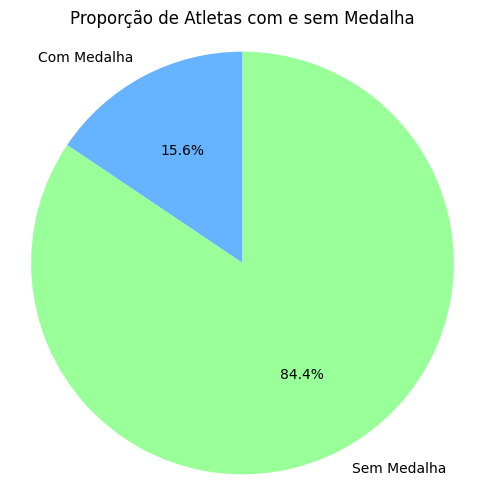

In [389]:
# Dados para o gráfico de pizza
labels = ['Com Medalha', 'Sem Medalha']
sizes = [qtd_medalhas, qtd_sem_medalhas]
colors = ['#66b3ff', '#99ff99']  # Cores para diferenciar as categorias

# Plotar o gráfico de pizza com a aparência desejada
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')  # Assegura que o gráfico de pizza seja desenhado como um círculo
plt.title('Proporção de Atletas com e sem Medalha')
plt.show()


A classe é muito desbalanceada, conforme previsto. Tenho algumas maneiras de lidar com isso.

####Hipóteses para lidar com o desbalanceamento

- **Undersampling**: É uma solução ruim, no final, teria pouquíssimos dados para treinar o modelo.
- **Oversampling**: Também é uma solução ruim, teria muito risco de overfitting.
- **SMOTE**: Me parece melhor do que as soluções acima porque interpolando as amostras existentes para gerar amostras sintéticas da classe minoritária talvez os dados gerados não sejam tão sujos. Mas ainda assim me soa bem ruim porque teria que criar muitíssimos dados sintéticos.

Concluo que a melhor maneira seria utilizar modelos de ML que lidam melhor com esses desbalanceamentos, como XGBoost e Florestas Aleatórias. A mudança de pesos com critérios mais dinâmicos geraria um modelo mais precisos, ainda mais sabendo que dentro de cada esporte, esses dados devem ter ainda mais particularidades, as quais esses algoritmos podem captar e gerar uma solução mais personalizada.

##Tratamento da classe 'Sex'

O sexo do atleta é uma variável categórica discreta e será tratada da mesma maneira que as medalhas.

In [390]:
#criando dataframe para o tratamento
df_sintetico_binario2 = df_sintetico_binario

# Converter os valores da coluna 'Sex' para 1 (M) e 0 (F)
df_sintetico_binario2['Sex'] = df_sintetico_binario2['Sex'].map({'M': 1, 'F': 0})
df_sintetico_binario2.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal_Binary
0,1,A Dijiang,1,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,1,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,1,24.0,178.0,73.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
4,10,"Einar Ferdinand ""Einari"" Aalto",1,26.0,184.0,78.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,0
5,12,Jyri Tapani Aalto,1,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,0


##Tratamento da classe 'Sport'

Como o escopo não é montar um modelo geral para todos os esportes em virtude das peculiaridades de cada um, que fazem com que o perfil físico de seus atletas sejam muito diferentes, não é necessário tratar esse dado com One-Hot encoding, por exemplo. Basta filtrar os dados para incluir apenas os registros daquele esporte específico antes de treinar o modelo.

##Padronização e Normalização

Como foi decidido que irei montar o modelo com os algoritmos XGBoost e Random Forests, não é necessário padronizar nem normalizar porque ambos algoritmos não são sensíveis à escala das variáveis.

##Criando o dataset final

Várias colunas não serão utilizadas no treinamento do modelo, por isso elas serão excluídas. Após isso crio um dataset final para a etapa de ML.

In [391]:
# Lista de colunas para remover
colunas_para_remover = ['ID', 'Name', 'Age', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Event']  # Substitua pelos nomes das colunas que deseja remover

# Criação de um novo dataset e remoção das colunas
df_ml = df_sintetico_binario2.drop(columns=colunas_para_remover)

Criação da tabela final para ser usada no treinamento

In [392]:
df_ml.head()

,Sex,Height,Weight,Sport,Medal_Binary
0,1,180.0,80.0,Basketball,0
1,1,170.0,60.0,Judo,0
2,1,178.0,73.0,Football,0
4,1,184.0,78.0,Swimming,0
5,1,172.0,70.0,Badminton,0


##Conclusão

Descobri que trabalhar sobre os dados olímpicos é se debruçar sobre os dados da história política, econômica e social do planeta. Os dados mostram, por exemplo, que o papel da mulher na sociedade de sua época é refletida nos esportes, assim como as consequências dos movimentos feministas. É possível notar o enorme impacto que as guerras e crises econômicas tiveram em todos os continentes. Recentemente, pudemos acompanhar uma novidade quando questões de saúde pública invadiram o ambiente olímpico com a pandemia de covid durante a Olimpíada de Tóquio.

Cada edição olímpica é uma entidade encarnada do mundo e do Homem daquele determinado momento. É uma fotografia de um tempo onde podemos refletir sobre as questões pungentes que nos cercam. Nessa última olimpíada de Paris vimos as manifestações contra e a favor ao povo judeu, em virtude da guerra com o Hamas, o banimento da Rússia pela guerra com a Ucrânia, e até com a transfobia nos deparamos, quando conhecemos a boxeadora argelina que sofreu ataques de ódio (e nem transexual de fato ela era) por causa de fake news, que a partir de então também invadiram o espaço olímpico.

Poderia ter realizado muitas outras análises, como descobrir se existe algum esporte com mais chance de idosos praticarem, ou então como o potencial de medalhas da antiga união soviética se espalhou entre seus países dissidentes. Não faltam perguntas interessantes a serem feitas e respondidas.

##Sugestão de melhorias

Gostaria de ter tratado os dados do dataset no final do projeto de uma maneira diferente para cada tipo de algoritmo de ML. Entretanto precisaria de mais tempo para conseguir incluir isso no escopo.

Gostaria também de saber fazer gráficos mais bonitos, isso será uma meta após o fim desse projeto.
